#                                         MASTER THESIS 
##                                                Previous fMRI data 


### Requiring necessary packages 


In [10]:
require(ggplot2)
require(GGally)
require(MASS)
require(ggfortify)
require(ggdendro)
#melting
require(reshape)
require(reshape2)
require(gridExtra)
#significance on ggplot 
require(ggsignif)
#for rlm results 
require(sfsmisc)
#TEX on plot
require(latex2exp)



### Insert the current pathway 


Loading required package: ggplot2
Loading required package: GGally
Loading required package: MASS
Loading required package: ggfortify
Loading required package: ggdendro
Loading required package: reshape
Loading required package: reshape2

Attaching package: 'reshape2'

The following objects are masked from 'package:reshape':

    colsplit, melt, recast

Loading required package: gridExtra
Loading required package: ggsignif
Loading required package: sfsmisc
Loading required package: latex2exp
Warning message:
"package 'latex2exp' was built under R version 3.5.2"

In [11]:
setwd("C:\\Users\\toto\\Dropbox\\Olga\\times series analysis")

# Dataframe: Loading daily practice time  

In [160]:
tsm<-read.table('Motivationseries.csv', sep = ',', header = T)
tsp<-read.table('Practiceseries.csv', sep = ',', header = T)
tsm 
tsp


SubjectNumber,Sex,Age,Group,Day1,Day2,Day3,Day4,Day5,Day6,...,Day242,Day243,Day244,Day245,Day246,Day247,Day248,Day249,Day250,Day251
1,M,77,English,NaN,2,3,2,4,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,79,English,7,NaN,3,NaN,4,4,...,0,0,0,0,6,0,NaN,0,0,0
5,F,69,Meditation,NaN,4,3,NaN,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,F,66,Meditation,NaN,NaN,NaN,NaN,NaN,NaN,...,2,3,1,2,0,2,3,2,0,0
8,M,69,Meditation,NaN,3,2,2,3,3,...,0,0,4,0,2,0,1,0,0,NaN
9,F,65,English,6,2,2,2,3,2,...,1,0,0,0,0,0,0,0,0,0
11,M,83,English,6,1,2,2,2,2,...,0,0,0,0,0,0,0,0,NaN,1
14,F,78,English,1,1,NaN,NaN,NaN,2,...,0,1,2,1,0,2,2,0,2,2
15,M,71,Meditation,NaN,2,1,2,1,1,...,2,1,5,2,1,1,2,3,2,4
16,M,69,Meditation,6,0,NaN,0,5,3,...,0,0,0,0,0,0,0,0,0,0


## ggparing to see the data set 

In [13]:
# ggpairs(baseline[,c(4:12)], title = 'Generalized pair plot of DVs and stress questionnaires', mapping=aes(color=Group, alpha=0.5),
#         upper = list(continuous = wrap("cor", size=3,alpha=0.5), combo = "box"),
#         lower = list(continuous = wrap("smooth", alpha = 0.3), combo = wrap("dot", alpha = 0.4)), legend = c(5,1)) +theme(legend.position = 'bottom')
# ggpairs(baseline[,c(4:8, 34:42)], title = 'Generalized pair plot of DVs and MRI signal activation', mapping=aes(color=Group, alpha=0.5),
#         upper = list(continuous = wrap("cor", size=3,alpha = 0.5), combo = "box"),
#         lower = list(continuous = wrap("smooth", alpha = 0.3), combo = wrap("dot", alpha = 0.4)), legend = c(5,1)) +theme(legend.position = 'bottom')
# ggcorr(baseline[, c(4:12, 34:42)], label = T, label_alpha = T)+ labs(title = 'correlation matrix')

# warning=FALSE

# Datasets for daily data: Motivation and practice time for 251 days, N=29

## Note for Christine:  we also have their daily motivation. 
we also acquired their daily motivation to practice. 
I just thought it is nice to show you how **UNRELATED** practice times and their motivations can be:)
they seem to have constant motivation to practice but do not act upon it

## Formatting the datasets 

### Melting the datasets: keeping the first 4 columns+ renaming the columns to score and day

In [161]:
tspmerg<-melt(data=tsp, id.vars = 1:4)
colnames(tspmerg)[5:6]<-c('Day', 'score')
tspmerg$Day<-as.numeric(substring(as.character(tspmerg$Day), 4))
#if want to View them remove the hashtag
#tspmerg


In [162]:
#if want to View them remove the hashtag
tspmerg


SubjectNumber,Sex,Age,Group,Day,score
1,M,77,English,1,NaN
2,M,79,English,1,7
5,F,69,Meditation,1,NaN
6,F,66,Meditation,1,NaN
8,M,69,Meditation,1,NaN
9,F,65,English,1,6
11,M,83,English,1,6
14,F,78,English,1,1
15,M,71,Meditation,1,NaN
16,M,69,Meditation,1,6


#### Subject numbers in to factors:
for graphing purposes we need factors and not continous numbering (for the color code)

In [165]:
tsmerg$SubjectNumber<-as.factor(tsmerg$SubjectNumber)
tspmerg$SubjectNumber<-as.factor(tspmerg$SubjectNumber)

In [166]:
str(tsmerg)

'data.frame':	7530 obs. of  6 variables:
 $ SubjectNumber: Factor w/ 30 levels "1","2","5","6",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Sex          : Factor w/ 3 levels "","F","M": 3 3 2 2 3 2 3 2 3 3 ...
 $ Age          : num  77 79 69 66 69 65 83 78 71 69 ...
 $ Group        : Factor w/ 2 levels "English","Meditation": 1 1 2 2 2 1 1 1 2 2 ...
 $ Day          : num  1 1 1 1 1 1 1 1 1 1 ...
 $ score        : num  NaN 7 NaN NaN NaN 6 6 1 NaN 6 ...


So a general reminder: since we have lots of NAs in the dataset, **we couldnt analyse the data with time series**


This gives a very dense graph thus we need to plot for only a few participants thus to have a better view over the data

## A general overview for practice time of the first 10 participants 

**Learn**: Day and Score were factprs thus geom_smooth was not showing on the plot. thus I changed it to as.numeric in the general data frame formatting code chunk

Warning message:
"Removed 1 rows containing missing values (geom_path)."

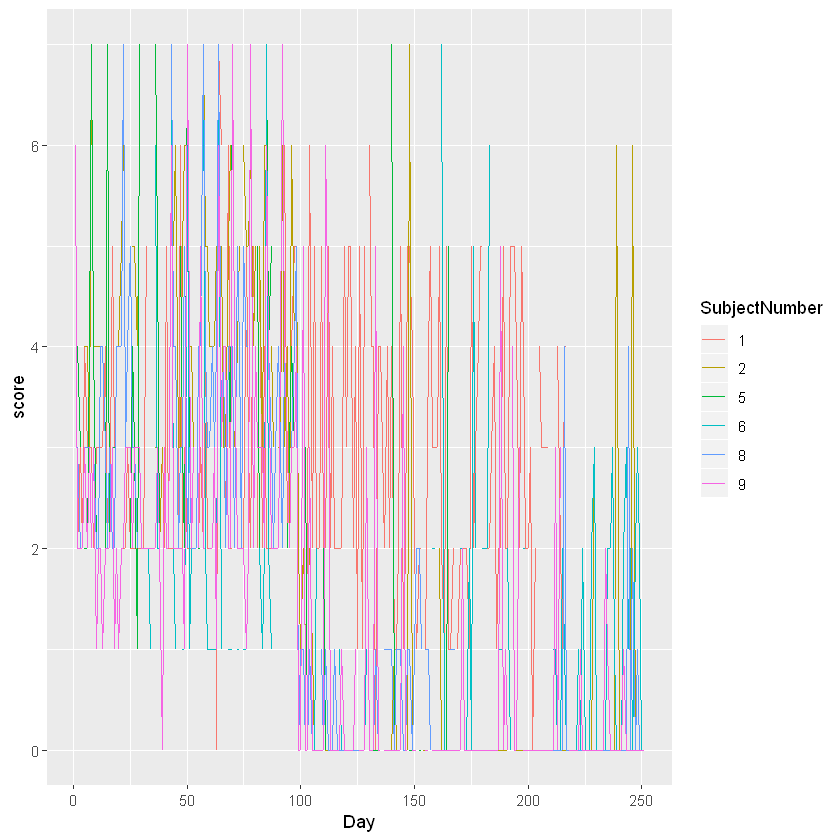

In [184]:
ggplot(tspmerg[tsmerg$SubjectNumber %in% 1:10,], aes(Day,score, color=SubjectNumber)) + geom_line(group = 1)


# Note for christine: as suggested : daily data for just one participant in meditation group

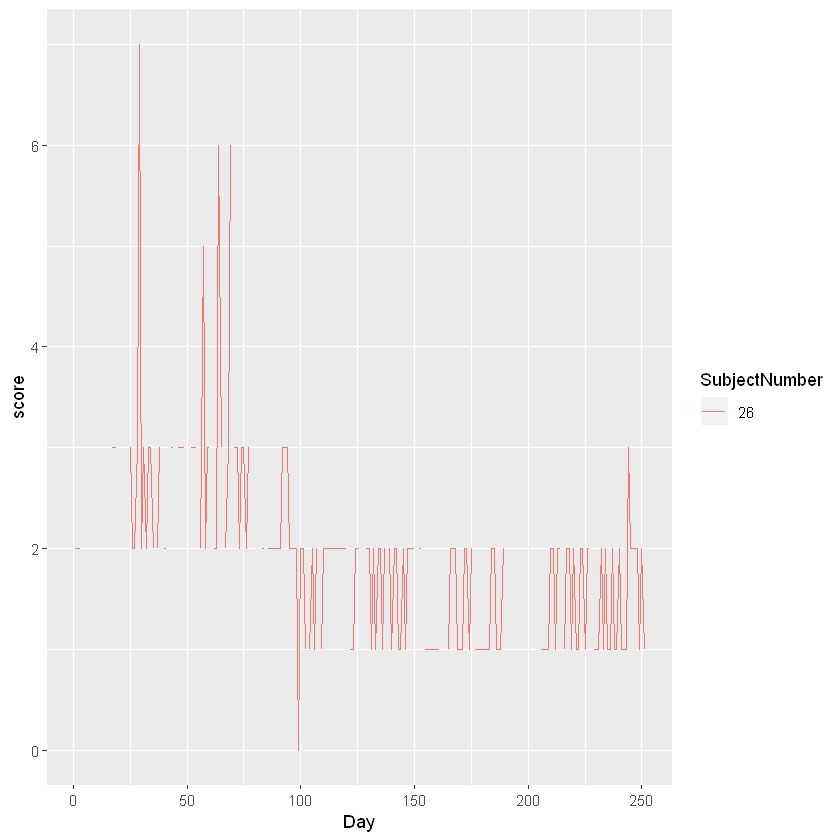

In [174]:
ggplot(tspmerg[tsmerg$SubjectNumber %in% 26,], aes(Day,score, color=SubjectNumber)) + geom_line(group = 1)


## with smooth lines

Warning message:
"Removed 482 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

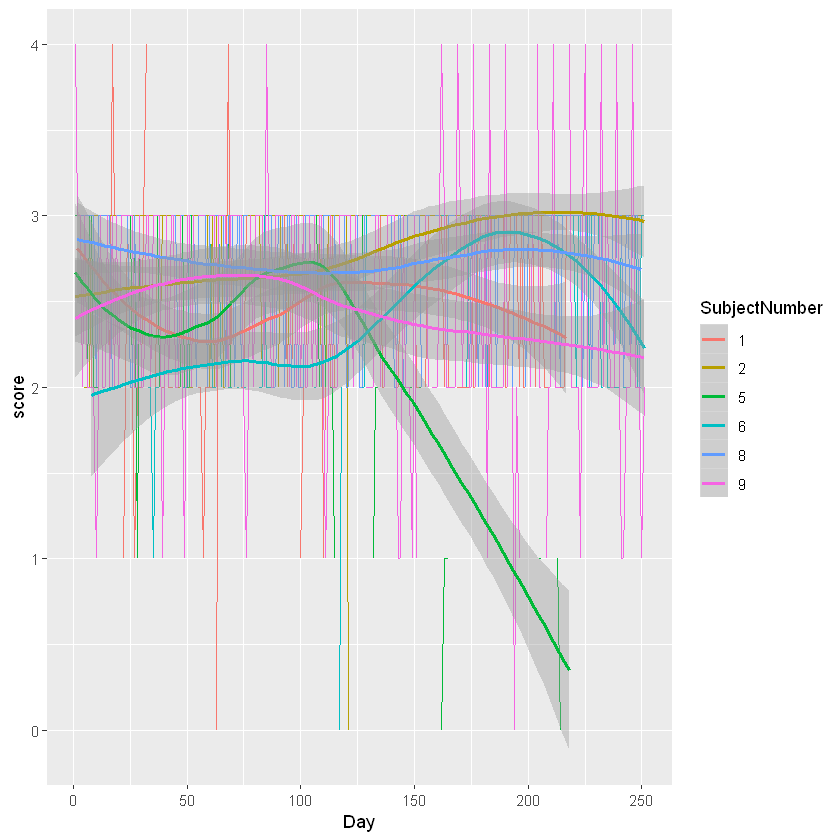

In [20]:
ggplot(tsmerg[tsmerg$SubjectNumber %in% 1:10,], aes(Day,score, color=SubjectNumber)) + geom_line(group=1)+ geom_smooth(method='loess')


## Only smooth lines for both groups and all of the participants

### Motivation plots 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1810 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1810 rows containing non-finite values (stat_smooth)."

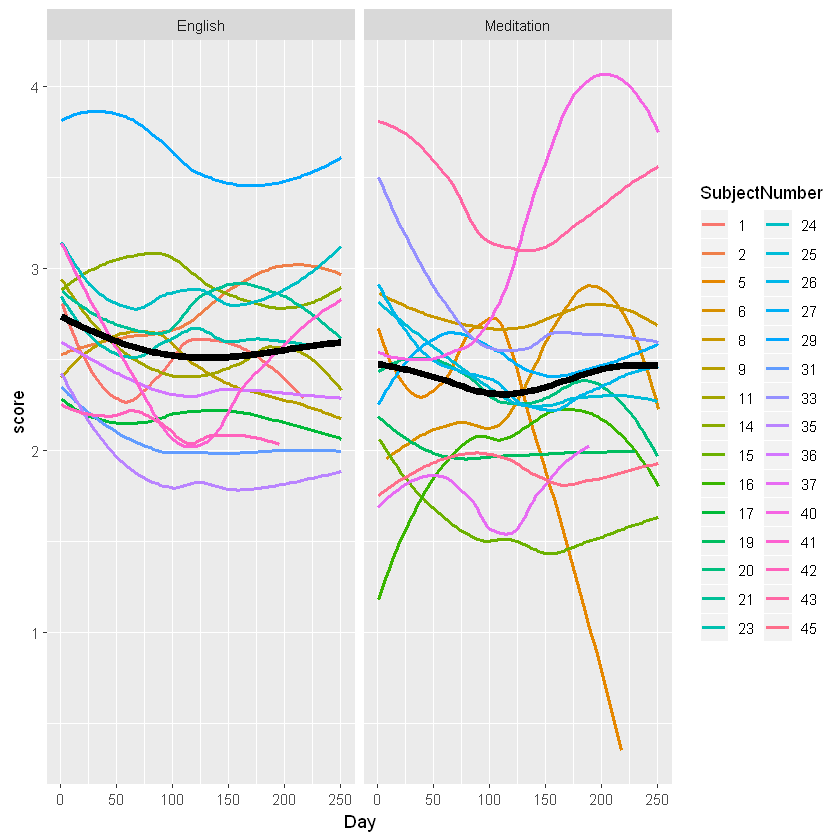

In [21]:
ggplot(tsmerg[tsmerg$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) +
  geom_smooth(se=FALSE) + facet_wrap(~Group, ncol = 2) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))


### Practice time plots 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1838 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1838 rows containing non-finite values (stat_smooth)."

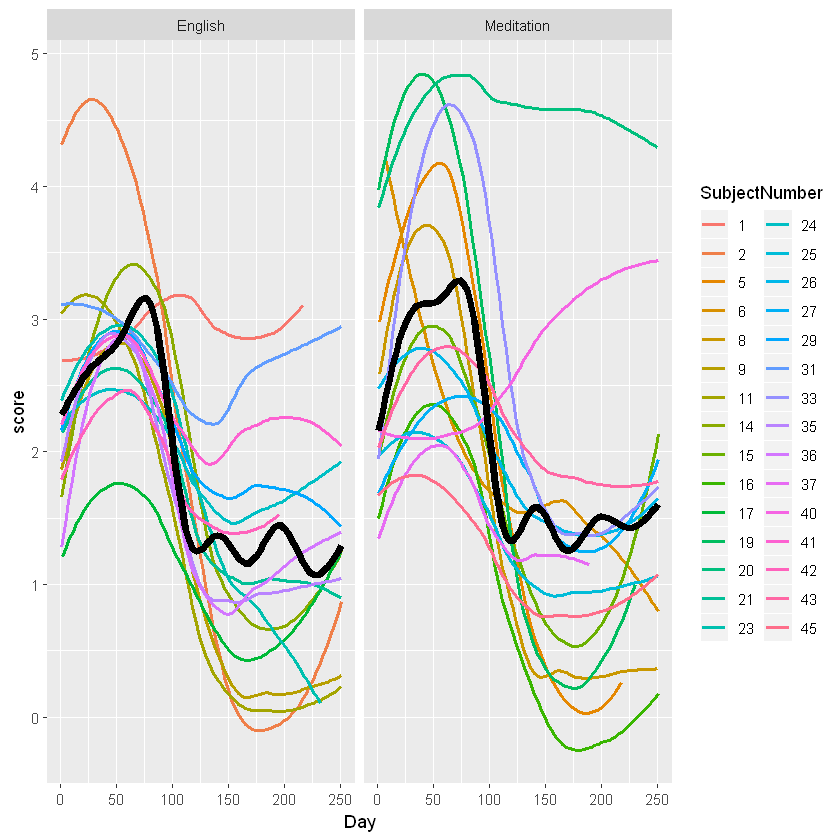

In [22]:
ggplot(tspmerg[tspmerg$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) +
  geom_smooth(se=FALSE) + facet_wrap(~Group, ncol = 2) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))

# Mix practice and motivation in to one dataframe
## AUX datasets 

In [175]:
aux.a<-tspmerg
aux.a$intervention<-'Practice'
aux.b<-tsmerg
aux.b$intervention<-'Motivation'
aux<-rbind(aux.a,aux.b)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 3648 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 3648 rows containing non-finite values (stat_smooth)."

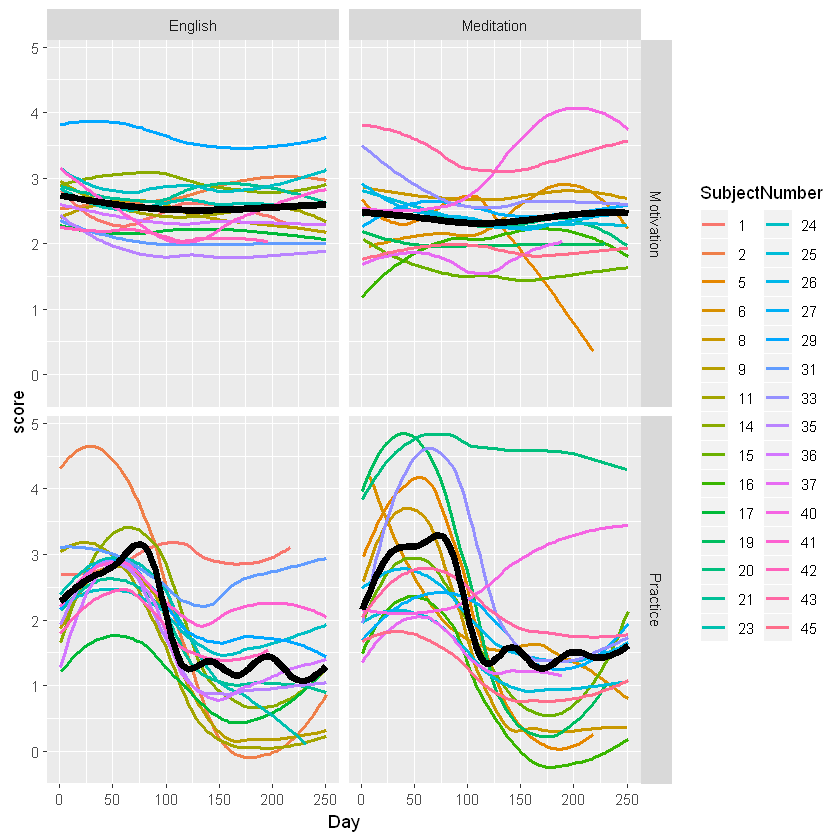

In [176]:
ggplot(aux[aux$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) + geom_smooth(se=FALSE) + facet_grid(intervention~Group) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))



## Diff datasets: changes in the scores 

Now we want to see the differnce between the scores of each day from its consequent day. In other words we aim at visualazing the **changes** in the scores of each day in relation to the next day. For this purpose we remove the NAs from the dataset. 

### Formatting datasets 

In [177]:
tsm[sapply(tsm, is.nan)] <- NA
tsp[sapply(tsp, is.nan)] <- NA

**Diff datasets**: in which subtract the scores of each day from its previous 


In [178]:
tspdiff<-cbind(tsp[,1:4],t(diff(t(tsp[,5:255]))))
tsmdiff<-cbind(tsp[,1:4],t(diff(t(tsm[,5:255]))))

Now lets melt it so we can plot the differences. 
id.vars is for saying which columns **not to melt** or **keep**


In [179]:
tspmldiff<-melt(data=tspdiff, id.vars = 1:4)
tsmldiff<-melt(data=tsmdiff, id.vars = 1:4)
#renaming the columns 
colnames(tsmldiff)[5:6]<-c('Day', 'score')
colnames(tspmldiff)[5:6]<-c('Day', 'score')
#turn day in to numerical variable
tsmldiff$Day<-as.numeric(substring(as.character(tsmldiff$Day), 4))
tspmldiff$Day<-as.numeric(substring(as.character(tspmldiff$Day), 4))
#removing NAs 
tsmldiff[sapply(tsmldiff, is.nan)] <- NA
tspmldiff[sapply(tspmldiff, is.nan)] <- NA
#subject numbers into factor for plotting 
tsmldiff$SubjectNumber<-as.factor(tsmldiff$SubjectNumber)

tspmldiff$SubjectNumber<-as.factor(tspmldiff$SubjectNumber)

### Plotting differing practice time scores 
This plot to see how different each score is from its' subsequent day

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 2550 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 2550 rows containing non-finite values (stat_smooth)."

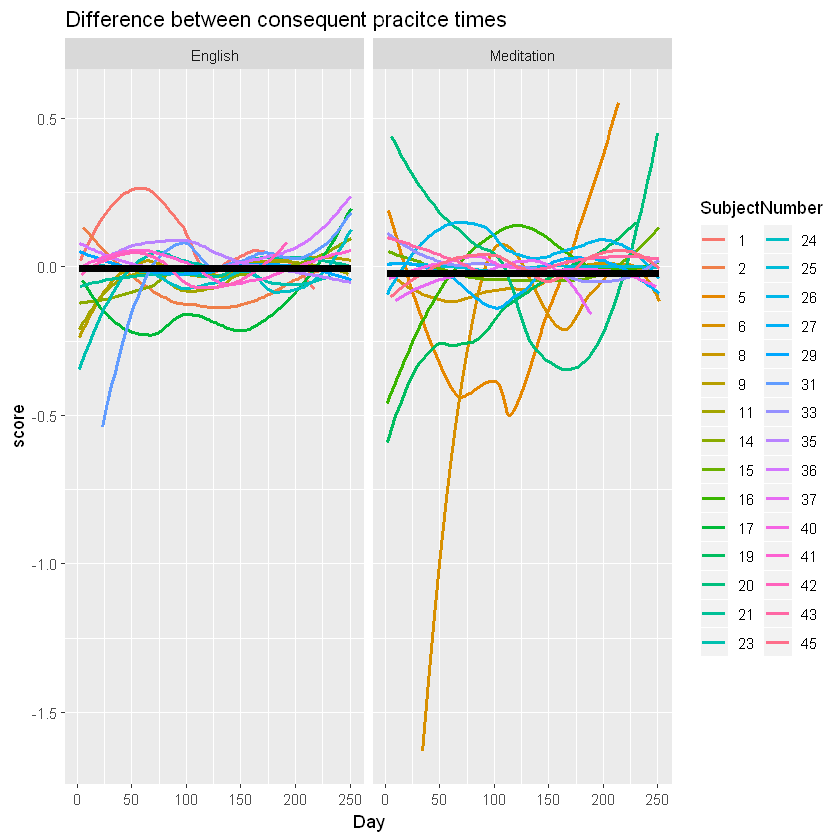

In [185]:
ggplot(tspmldiff[tspmldiff$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) +
  geom_smooth(se=FALSE) + facet_wrap(~Group, ncol = 2) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1)) +ggtitle('Difference between consequent pracitce times')



### Plotting practice scores 

In [ ]:
ggplot(tspmldiff[tspmldiff$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) +
  geom_smooth(se=FALSE) + facet_wrap(~Group, ncol = 2) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1)) +ggtitle('motivation')



### All 4 graphs in one graph:
Here I also included motivation scores differences 

#### Merging datasets into one : aux1 dataset 

In [29]:
aux1.a<-tspmldiff
aux1.a$intervention<-'Practice'
aux1.b<-tsmldiff
aux1.b$intervention<-'Motivation'
aux1<-rbind(aux1.a,aux1.b)

### Plotting 


`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 5083 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 5083 rows containing non-finite values (stat_smooth)."

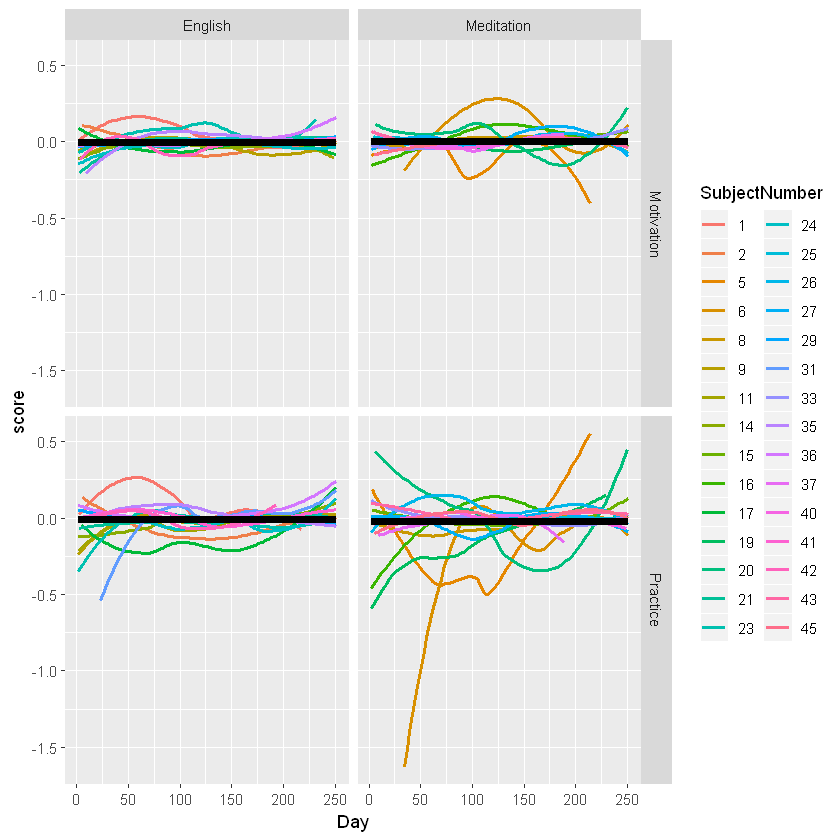

In [30]:
ggplot(aux1[aux1$SubjectNumber %in% c(1:45),], aes(Day,score, color=SubjectNumber)) + geom_smooth(se=FALSE) + facet_grid(intervention~Group) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))


Here we see that there is not much difference from day to day in 4 graphs except for some individuals. Generally speaking, the meditation group have higher variance. 
**Note**: the subject number does not contain all 45 participants (the passive controls are out)


### A function to substract vectors containing daily scores :


In [31]:
corf<-function(x){
  #if we dont have length of 2 )
  if(length(x)!=2)NA else x[2]-x[1]
}

#### Does motivation has an effect on the practice time of the consequent day?
I wanted to see whether motivation practice of one day has an effect on the time an individual allocate on the next day.

##### Dateset auxag: from aux and with the corf function 

1. Building a new column for scores as numericals and perform the new function **corf** on it
2. this is how the aggregate formula translates: for each value of subject number, group (english/meditation) and day take the corf funciton of the sn column. so basically the function can vary for intervention for each value of sn. more precisely, take the difference between the scores of motivation-practice 
3. as can be seen in the aggregate function we need values that can group people. thus they have to be "factorial". thus we have changed the variable type of **Day** to factor. we need another column called **day** that is actually numerical and good for plotting.

In [32]:
aux$sn<-as.numeric(as.character(aux$score))
#aggregate perform the function on the selected datset and column
auxag<-aggregate(data=aux,sn~SubjectNumber+Group+as.factor(Day),FUN =corf)
colnames(auxag)[3]<-"day"
auxag$day<-as.numeric(as.character(auxag$day))


### Plotting auxag: Motivation - practice 
just with smoothed lines (removed the lines from time series)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 76 rows containing non-finite values (stat_smooth)."

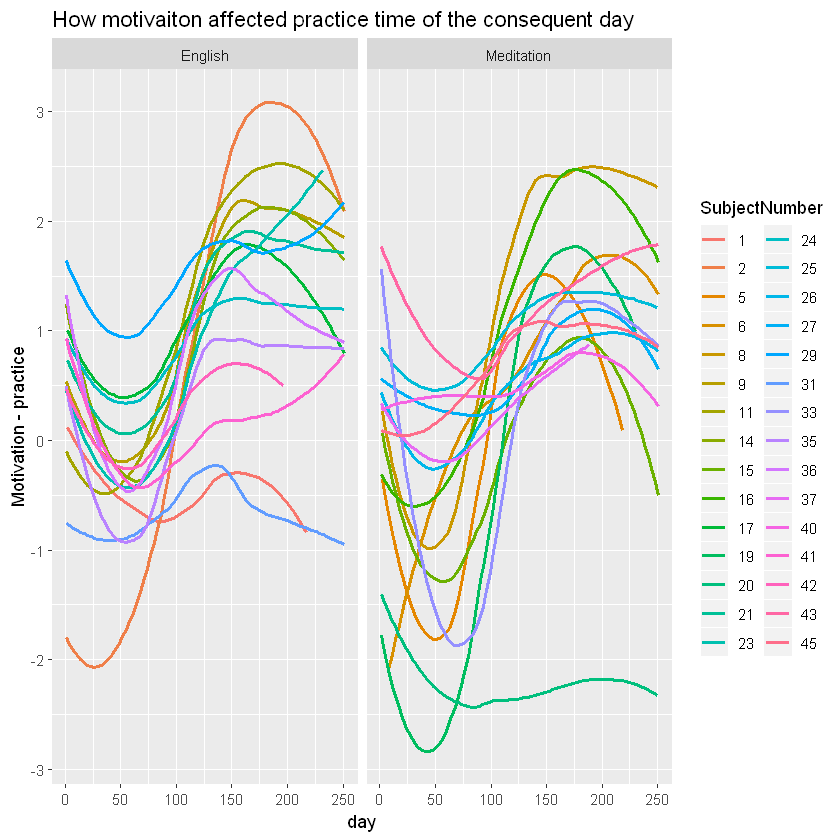

In [33]:
ggplot(auxag, aes(day, sn, color=SubjectNumber))+ facet_wrap(~Group) +geom_smooth(se=FALSE)+ ggtitle('How motivaiton affected practice time of the consequent day') + labs(y="Motivation - practice")


if you want to make sure which of the **sn** values were subtracted from which, you take the data for one participant and for two consequen days like below: 

In [34]:
auxag1<-aggregate(data=aux[aux$SubjectNumber==1 & aux$Day %in% 1:3,],sn~SubjectNumber+Group+as.factor(Day),FUN =corf)
auxag1

SubjectNumber,Group,as.factor(Day),sn
1,English,2,1
1,English,3,0


We can see that motivation-practice. usually it follows the alphabetic order.

### A better way to visualize day to day score variation is through jitter plot

#### Auxm dataset: the data set for the jitter plot: 
We should have two columns
1. one starting from the scores of the first day through 250 (1 day less than 251). 
2. the other starts from the second day throught out the last day
then in each row we will have the data of two consequtive days: e.g. row 1: column 1: day 1 and column 2 :day 2 
now we can plot the score of each day as a function of its previous. similar to the chart above we will see whether the score of each day have an effect to its consequent. **difference**: above chart is showing the effect of motivation scores ont he consequent day. this chart will show the effects of each type of score (i.e. practice) on its consequent day's score i.e. what is the general scoring tendency for each questionaire (practice and motivatio)

**this is an example how this should look like:**




In [35]:
next_day<-aux$sn[aux$Day!=1 & aux$intervention=='Practice']
previous_day<-aux$sn[aux$Day!=251 & aux$intervention=='Practice']

Warning message:
"Removed 2550 rows containing missing values (geom_point)."

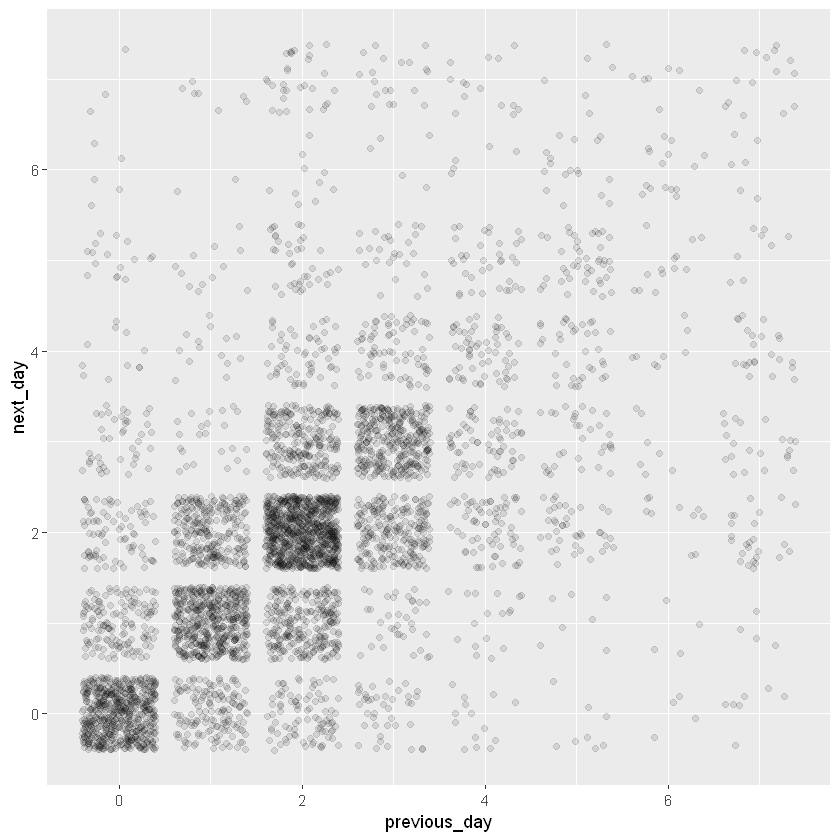

In [36]:
ggplot(NULL, aes(previous_day, next_day)) + geom_jitter(alpha=0.1)


Now we want to have a dataset that contains two columns 

A. scores of previous day 

B. score of the next day 

for this purpose first we have to make two datasets 
1. one contains all of the scores excluding the last day >auxp
2. the other that contains all of the scores excluding the first day> auxn

In [37]:
auxn<-aux[aux$Day!=1,]
auxp<-aux[aux$Day!=251,]
#then we harmonize the day count by substracting 1 from the auxn
auxn$Day<-auxn$Day-1

In [38]:
colnames(auxn)[8]<-"next_day"
colnames(auxp)[8]<-"previous_day"

### dataset:AUXM

In [39]:
auxm<-merge(auxn,auxp,all=T, by=c(1:5,7))


### Plot auxm
Here I have divided the duration of the study in to two epochs 

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

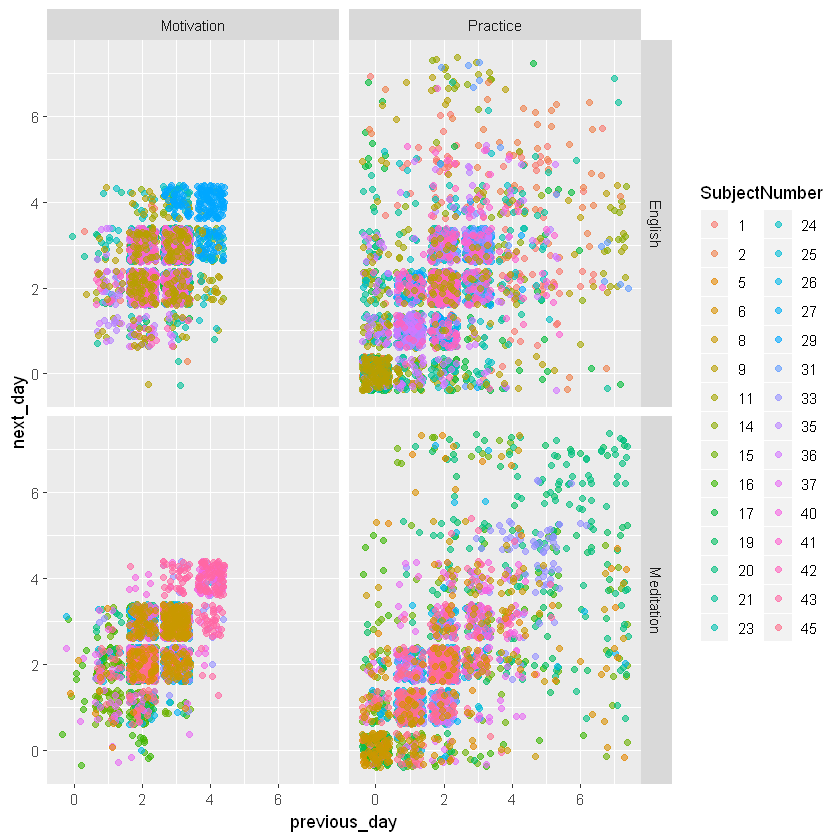

In [40]:
ggplot(auxm, aes(previous_day, next_day, color=SubjectNumber)) + geom_jitter(alpha=0.6) +facet_grid(Group~intervention)


Here we hava the clusters for the whole duration. If we want to see in more precise manner, we divide it into more epoch. here is the column for dividing it in 5 epochs (~50 days in each epoch)


In [41]:
auxm$epoch<-cut(auxm$Day,breaks = 5, labels = paste("epoch",1:5,sep = "_"))


### Plot auxm with 5 epochs 
And here I have divided it into 5 epochs (each 50days~ one epoch)

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

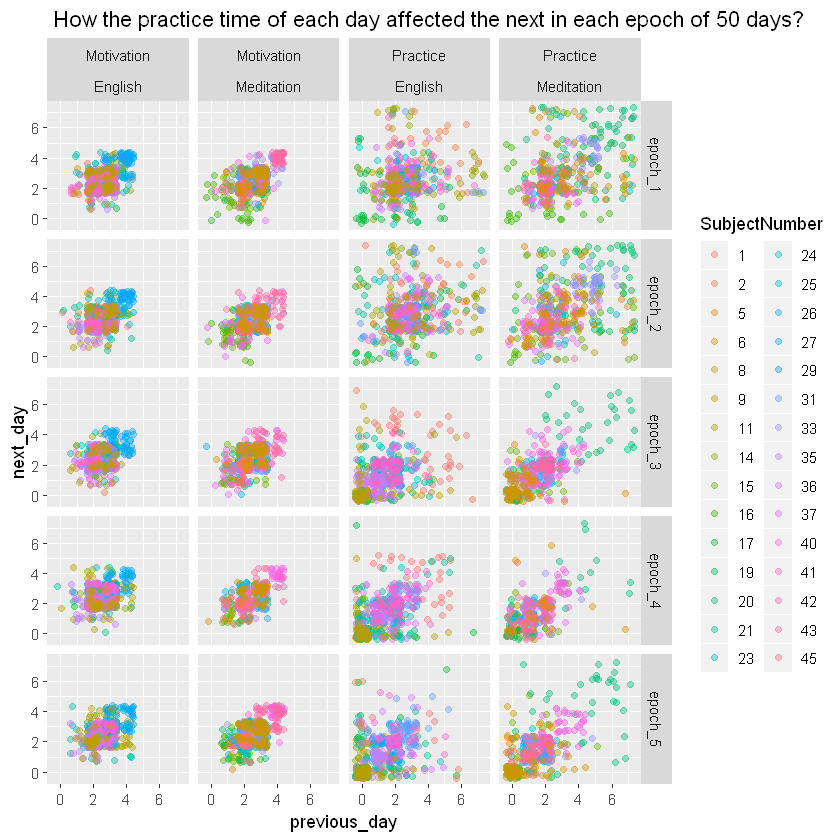

In [42]:
ggplot(auxm, aes(previous_day, next_day, color=SubjectNumber)) + 
  geom_jitter(alpha=0.4) +facet_grid(epoch~intervention+Group) + labs (title=' How the practice time of each day affected the next in each epoch of 50 days? ')


here is another option for dividing it into 2 halves: 

In [43]:
auxm$halfcycle<-cut(auxm$Day,breaks = c(0,126,252), labels = c('First half of study(0-125d)', 'Second half of study (126-251)'))


### Plot auxm with 2 epochs (two epochs)

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

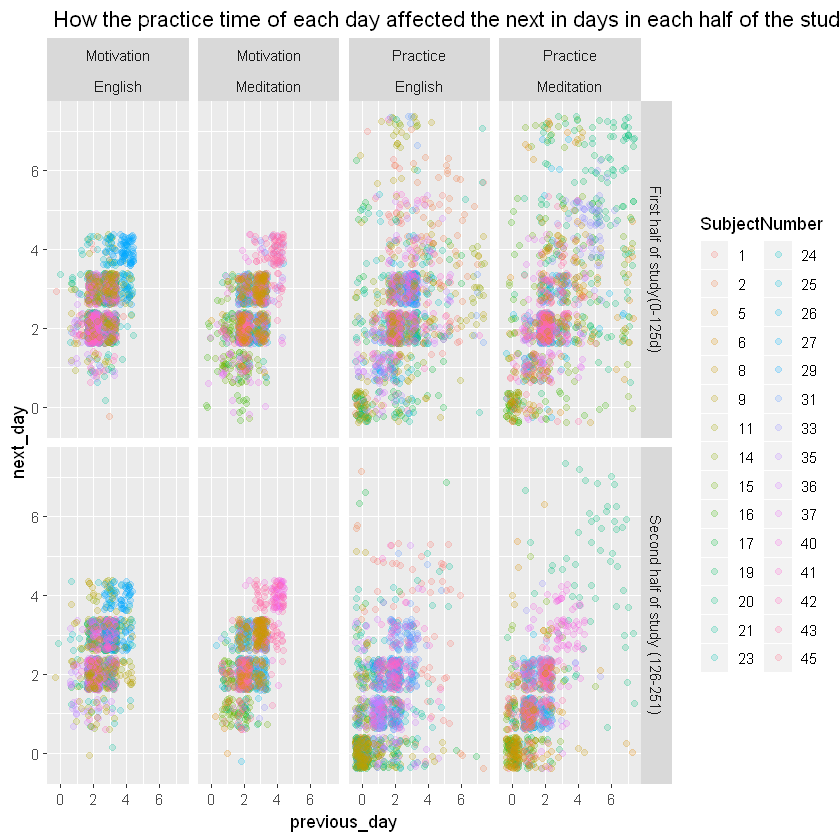

In [44]:
ggplot(auxm, aes(previous_day, next_day, color=SubjectNumber)) + 
  geom_jitter(alpha=0.2) +facet_grid(halfcycle~intervention+Group) + labs (title=' How the practice time of each day affected the next in days in each half of the study duration? ')


**Note**:There are all sorts of playing with the look of this graph. we can change the color code, shape of the dots and so on. we also plotted a **violin plot** to see **individuals' variations more clearly**.find them in the original R file "timeseries.R" **this was the final useful plot**

now we can color subjects based on the questionnaires' scores. **here is the STAI**
**Note**: the final csv contains the **wrong old fMRI data**
### auxmfinal dataset: values for STAI scores


In [45]:
finalall<-read.table('Final.csv', sep = ',', header = T)
final<-finalall[,c(3,12,13)]
auxmfinal<-merge(auxm,final, all.x = T, by=c(1))


### Plot STAI A
Here I thought it would be a good idea to look how baseline questionnairemight might relate to the daily score with simple coloring. Here we have a questionnaire that measures indviduals'  anxiety level at the time of filling the questionnaire (state anxiety questionnaire)

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

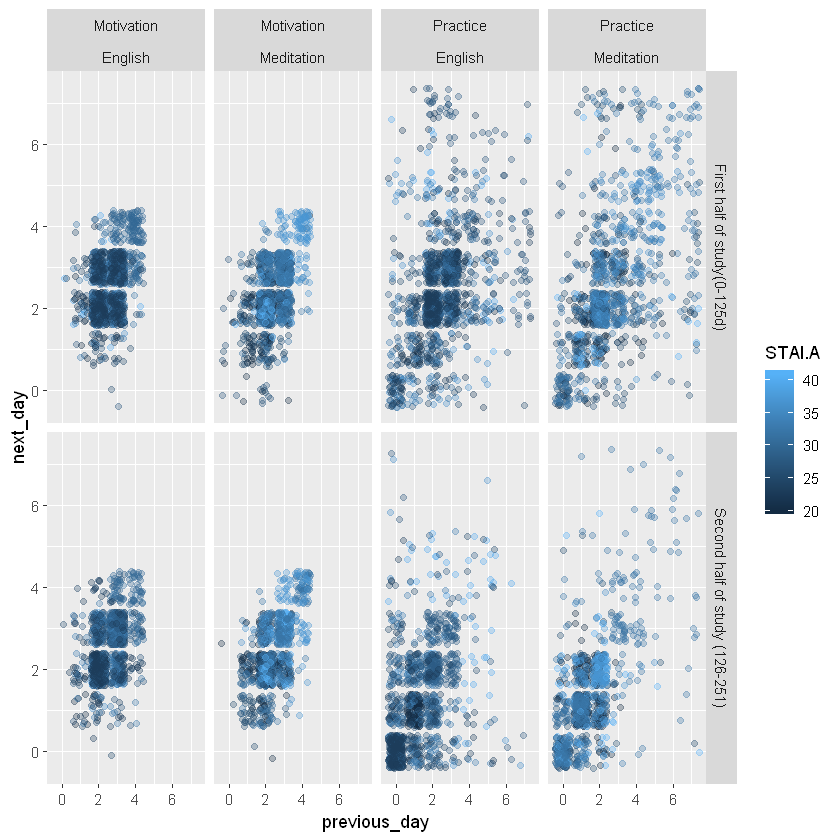

In [46]:
ggplot(auxmfinal, aes(previous_day, next_day, color=STAI.A)) + 
  geom_jitter(alpha=0.3) +facet_grid(halfcycle~intervention+Group) 

### Plot STAI B: trait anxiety questionnaire 
Which measures individual's general anxiety level 

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

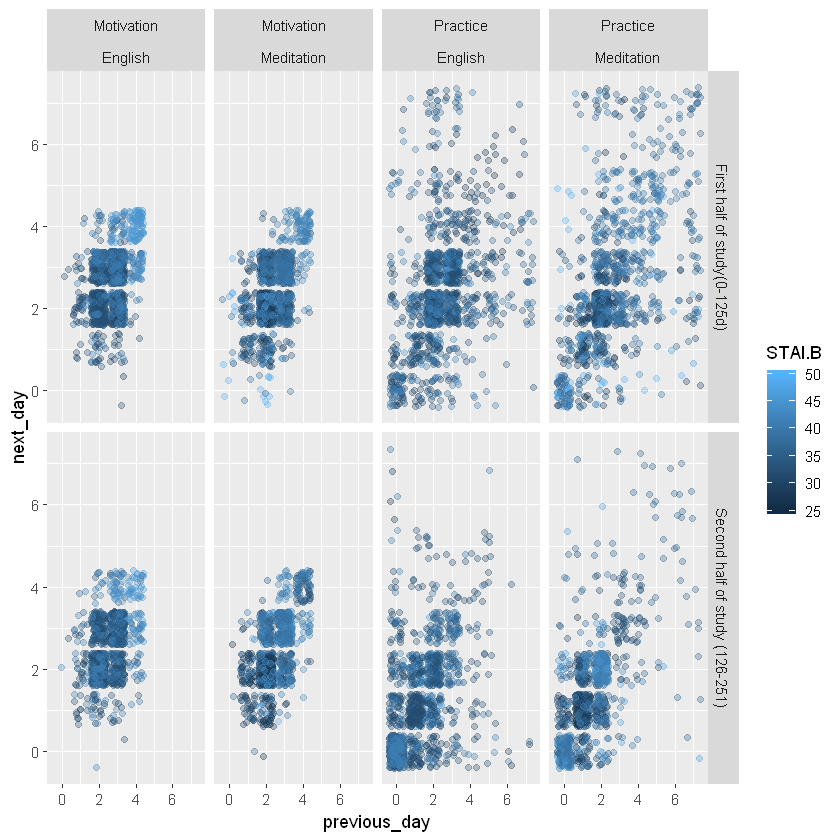

In [47]:
ggplot(auxmfinal, aes(previous_day, next_day, color=STAI.B)) + 
  geom_jitter(alpha=0.3) +facet_grid(halfcycle~intervention+Group) 

### Lets factorize STAI B based on clinical data
* Low stress: 24-29
* Medium anxiety: 30-42
* High anxiety: 43-51 > generally higher than 43 is considered high anxiety

In [48]:
auxmfinal$STAI.Bfac<-cut(auxmfinal$STAI.B,breaks = c(24,29,43,51))
auxmfinal

SubjectNumber,Sex,Age,Group,Day,intervention,score.x,next_day,score.y,previous_day,epoch,halfcycle,STAI.A,STAI.B,STAI.Bfac
1,M,77,English,1,Motivation,3,3,NaN,NaN,epoch_1,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,1,Practice,2,2,NaN,NaN,epoch_1,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,10,Motivation,3,3,2,2,epoch_1,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,10,Practice,3,3,3,3,epoch_1,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,100,Motivation,2,2,1,1,epoch_2,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,100,Practice,2,2,1,1,epoch_2,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,101,Motivation,3,3,2,2,epoch_3,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,101,Practice,1,1,2,2,epoch_3,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,102,Motivation,2,2,3,3,epoch_3,First half of study(0-125d),40,32,"(29,43]"
1,M,77,English,102,Practice,2,2,1,1,epoch_3,First half of study(0-125d),40,32,"(29,43]"


### Plot STAI B for with clinical implications

Warning message:
"Removed 5083 rows containing missing values (geom_point)."

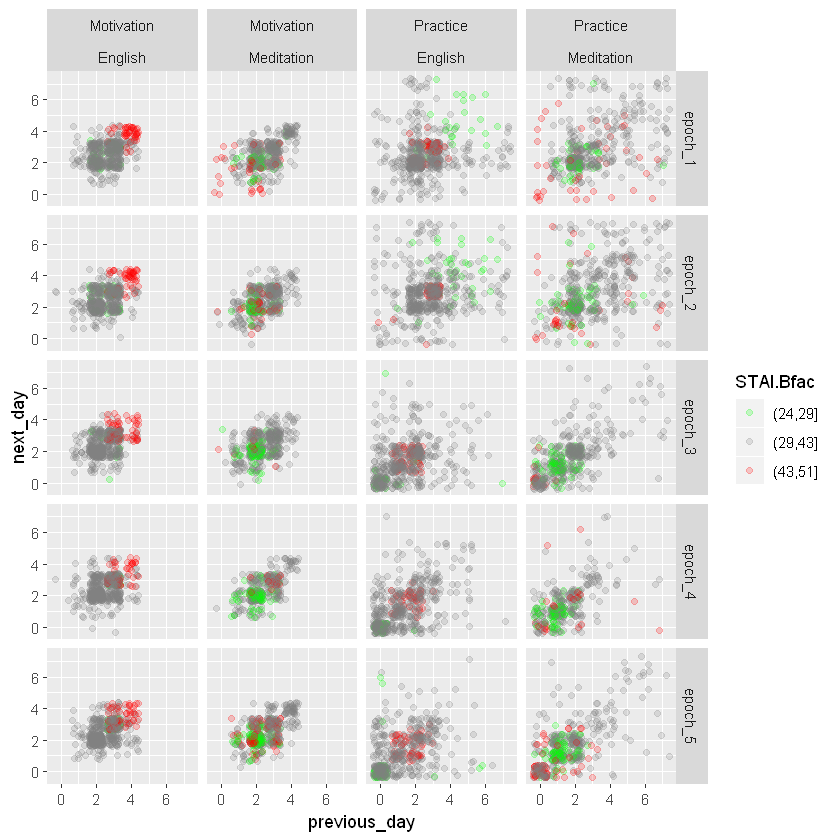

In [49]:
ggplot(auxmfinal, aes(previous_day, next_day, color=STAI.Bfac)) + 
  geom_jitter(alpha=0.2) +facet_grid(epoch~intervention+Group) +scale_color_manual(values=c("green", "grey50", "red"))

1. Here again we can visualize using different options like shape for gender and so on to see what are the potentially interesting factors 
2. In the original file you can find **coloring with all other questionnaires and brain data**. you can do that anytime since all of them are in the file **final.csv**

## Classification steps: FROM HERE WE JUST ANALYSE "PRACTICE TIME "
### Individual Density plots 

From figures above, we understood that it might be possibel to classify individuals based on their variability and average. thus now we want a new dataset that calculate the variance and average of the whole duration and each half of the study
now **why i preferred to only have two epochs?** because of this graph:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
"Removed 1838 rows containing non-finite values (stat_smooth)."`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'
Warning message:
"Removed 1838 rows containing non-finite values (stat_smooth)."

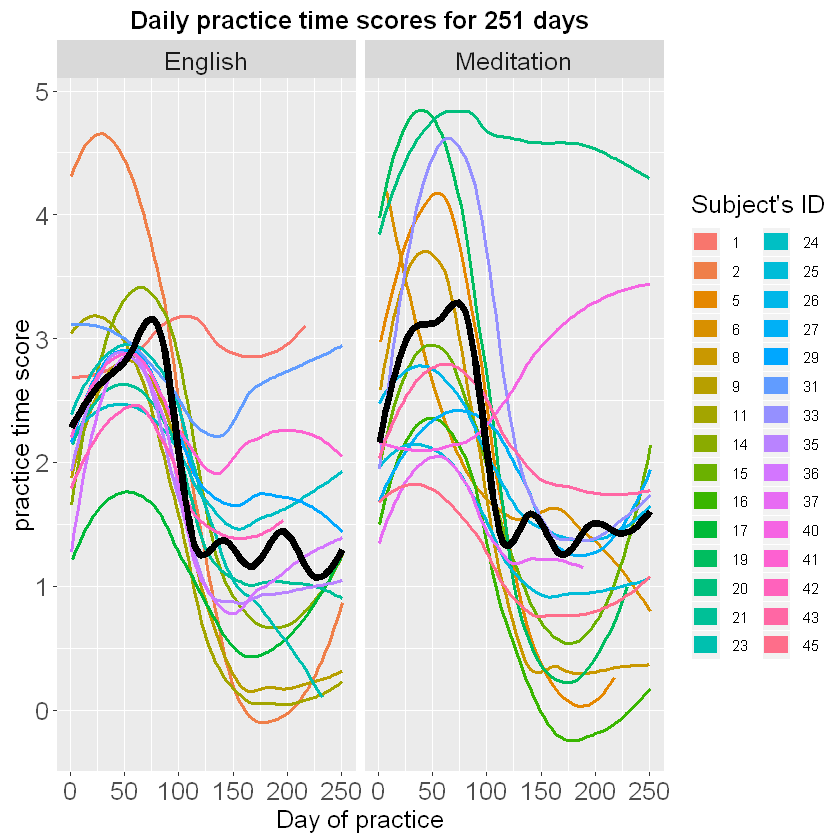

In [50]:
ggplot(aux[aux$SubjectNumber %in% c(1:45)&aux$intervention %in% 'Practice',], aes(Day,score, color=SubjectNumber)) + geom_smooth(se=FALSE) + facet_grid(~Group) + geom_smooth(se=FALSE, size=2, color='black', aes(group=1))+
theme(strip.text=element_text(size=15),  axis.title=element_text(size=15) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15))+ guides(colour = guide_legend(override.aes = list(size=5)))+
  xlab('Day of practice') + ylab('practice time score') + labs(title='Daily practice time scores for 251 days') + 
  theme(plot.title = element_text(size = 15, face = "bold")) + theme(plot.title = element_text(hjust = 0.5)) +labs(color="Subject's ID")

Arbirtrarily,the pracitce time variability changes at about half-study. to make sure that such interpretation is rigth, we run a var.test to compare whether the variability of first and second halves are different:

In [51]:
var.test(tspmerg[tspmerg$Day %in% 1:125,6],tspmerg[tspmerg$Day %in% 125:260,6])


	F test to compare two variances

data:  tspmerg[tspmerg$Day %in% 1:125, 6] and tspmerg[tspmerg$Day %in% 125:260, 6]
F = 1.4981, num df = 2953, denom df = 2760, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.391969 1.612071
sample estimates:
ratio of variances 
          1.498052 


As can be seen **they are significanlty different**. Thus now we will see how we can use **variance** and **average** to classify individuals. first we need variabels conrtaining the average and variance of the 
1. whole duration 
2. each half of the study

In [52]:
varp<-apply(tsp[,c(5:255)],1,var, na.rm=TRUE)
avgp<-apply(tsp[,c(5:255)],1,mean, na.rm=TRUE)
avg125<-apply(tsp[,c(130:255)],1,mean, na.rm=TRUE)
varp125<-apply(tsp[,c(130:255)],1,var, na.rm=TRUE)

In [53]:
vardat<- cbind(tsp[,c(1,4)],avgp,varp, avg125, varp125)

###  Density plots 

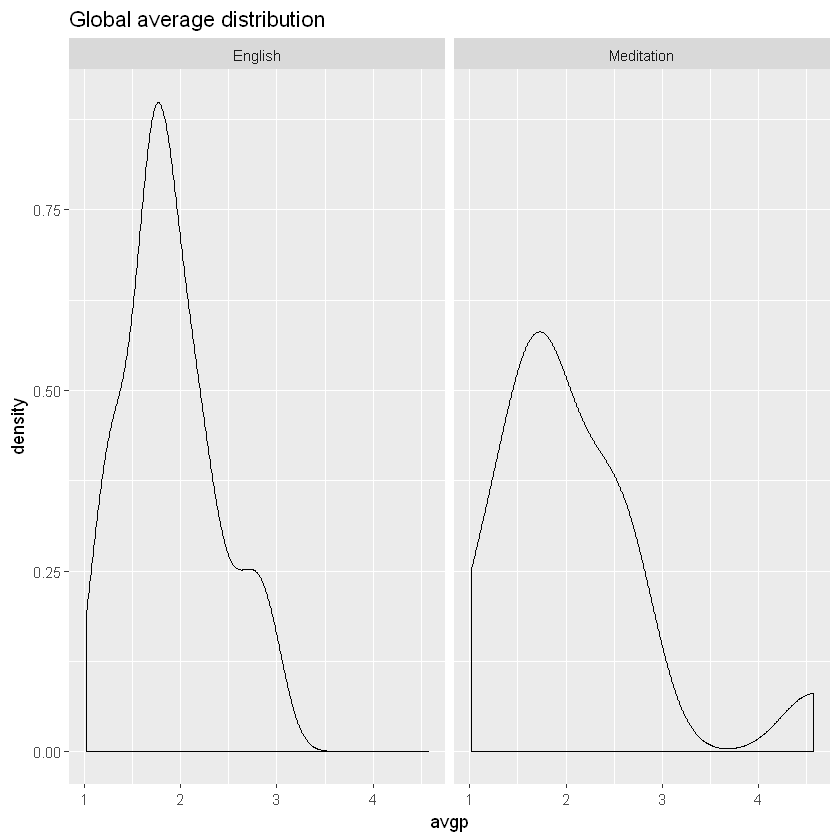

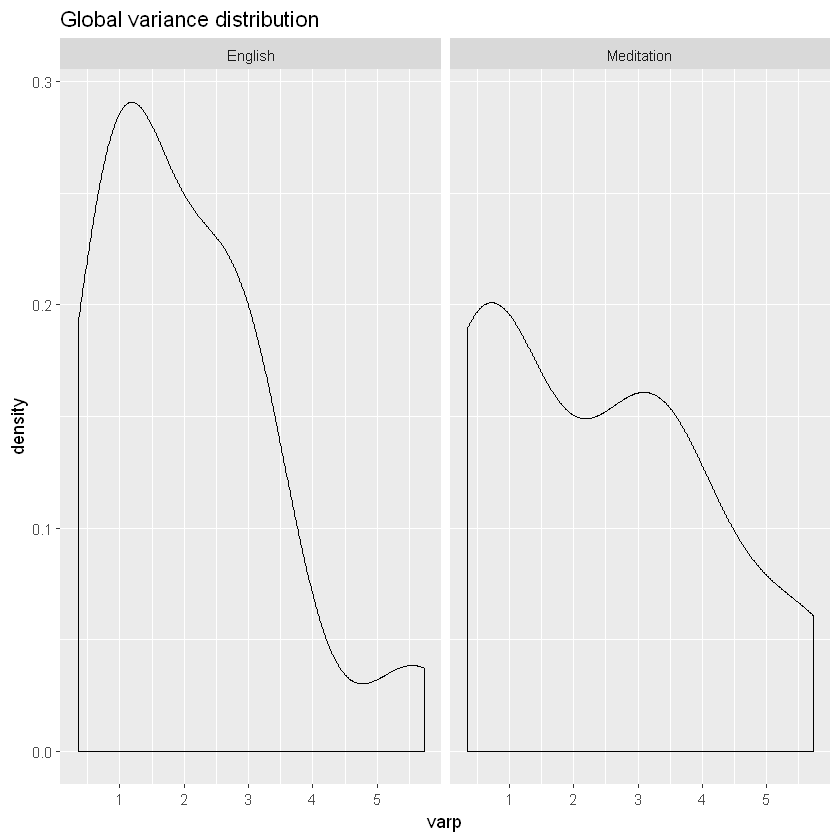

In [54]:
ggplot(vardat) + geom_density(aes(avgp, y=..density..)) + facet_wrap(~Group) + labs(title="Global average distribution")
ggplot(vardat) + geom_density(aes(varp, y=..density..))+ facet_wrap(~Group) + labs(title="Global variance distribution")

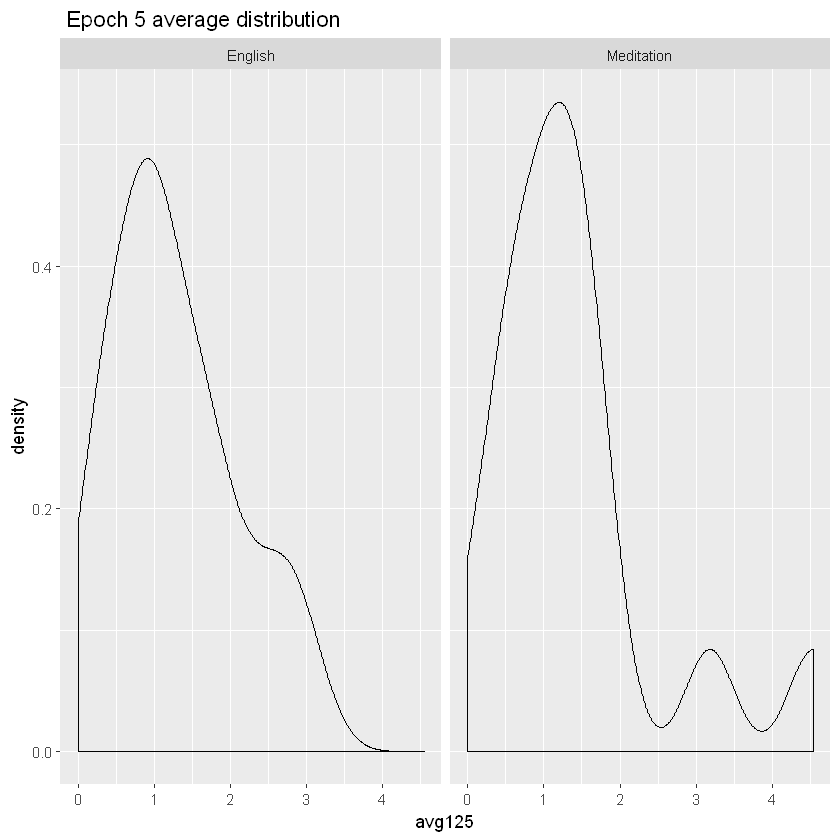

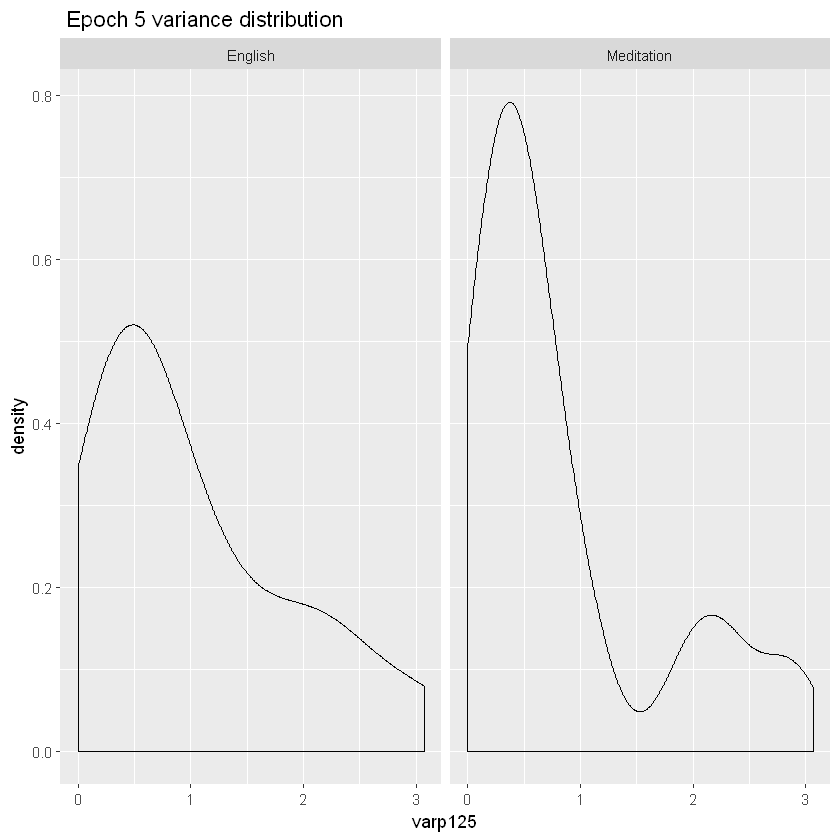

In [55]:
ggplot(vardat) + geom_density(aes(avg125, y=..density..))+ facet_wrap(~Group) + labs(title=" Epoch 5 average distribution")
ggplot(vardat) + geom_density(aes(varp125, y=..density..))+ facet_wrap(~Group) + labs(title=" Epoch 5 variance distribution")

### Now 2d density plots with subject points on it:

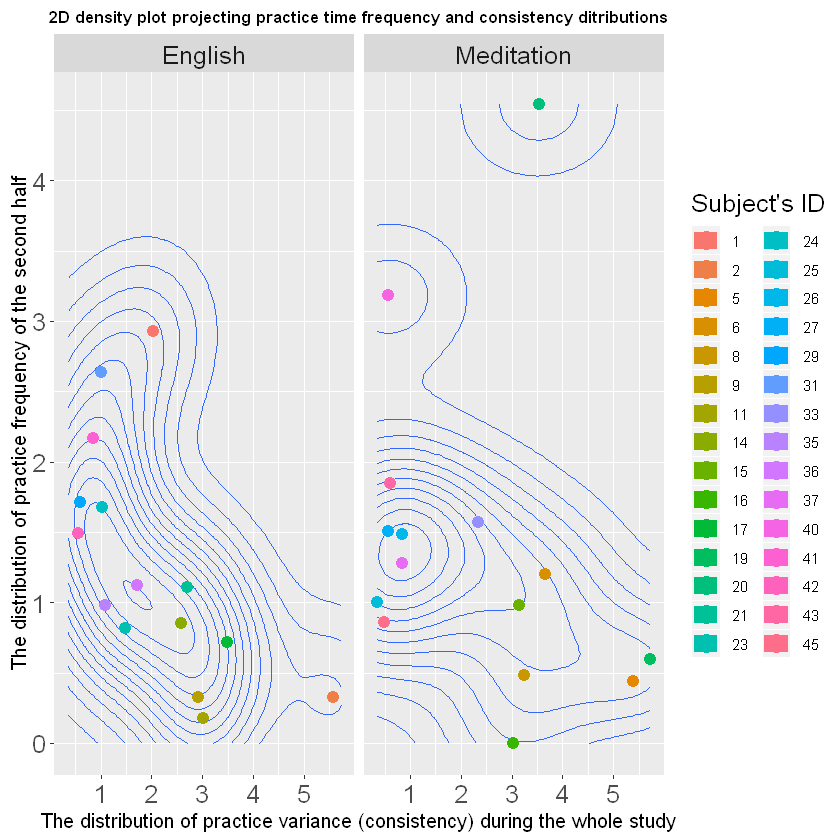

In [189]:
ggplot(vardat, aes(varp, avg125)) + geom_density2d() + ggtitle ("2D density plot projecting practice time frequency and consistency ditributions") +
    geom_point(aes(colour=as.factor(SubjectNumber)), size=3) +facet_wrap(~Group) +
facet_wrap(~Group) + xlab('The distribution of practice variance (consistency) during the whole study') +ylab('The distribution of practice frequency of the second half')+
  theme(plot.title = element_text(size = 15, face = "bold")) + theme(plot.title = element_text(hjust = 0.5)) +
  theme(strip.text=element_text(size=15),  axis.title=element_text(size=12) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15))+ guides(colour = guide_legend(override.aes = list(size=5))) +
  labs(color="Subject's ID") +  theme(plot.title = element_text(size=10))

Again arbitrarily we have divided individuals into two clusters according to their **Practice variance**: 
1. **stable individuals**: those with practice variability lower than 2 
2. **Unstable individuals**: those with practice variability higher than 2
then we have grouped them and formed a new column called **stability** 

In [57]:
vardat$stability<-cut(vardat$varp,breaks = c(0,2,10),labels = c("stable", "unstable"))


In [85]:
vardat


SubjectNumber,Group,avgp,varp,avg125,varp125,stability
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable
9,English,1.334728,2.9126965,0.3247863,1.01429413,unstable
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable


# Previous dataset (ROI2b2p.csv)
## Note for Christine: 
I was informed that the fMRI dataset I have worked with has some issues. Thus I would not be sure if following results would be particularly valid after the correction. But here I just want to share whatever I worked with 
### Reading the brain activities with which I have worked

In [98]:
ROI<-read.table('ROI2b2p.csv', sep = ',', header = T)

In [99]:
ROI

sub,Intervention,LAI,RAI,Lamyg,Ramyg,LdlPFC,RdlPFC,LdmPFC,RdmPFC,LACC,RACC
1,English,1.85024310,0.27818134,-6.2331530,-5.1765018,-1.12882640,5.3530017,-0.21315054,-4.79842814,-2.8041820,-3.0304177
2,English,2.41419331,2.88342597,-1.4215655,1.1899271,3.81661696,3.3550972,-1.12648222,-1.73037058,7.3178466,4.6384526
5,Meditation,-0.79780702,1.94872512,-2.1083511,-3.1124173,-10.44698160,-8.0425374,-1.12804335,-1.24343759,-3.7029202,-4.5818444
6,Meditation,-0.25734621,-1.01233854,3.0044455,4.4910478,0.11215109,0.2530386,-0.78463987,1.63195823,0.7128629,0.2348676
8,Meditation,4.35723411,2.09813184,-0.6057405,0.4522227,2.23302483,0.9149753,2.10744898,1.79222356,2.6242822,1.9367767
9,English,1.88974708,-0.91364856,0.2509311,3.2253654,1.67350165,3.0238013,-0.36868671,1.35627881,0.4869707,0.6179904
11,English,1.06772256,0.73960193,3.7012183,3.5246447,2.44086794,-0.2878777,0.49802920,1.36127999,3.9330576,2.8545152
14,English,-1.14577743,-1.11328061,-1.4414149,-1.8933637,0.93889448,-0.5383270,1.29558294,0.26718403,1.5931952,0.6791388
15,Meditation,2.17892238,2.76067676,1.8343476,-1.5813419,1.23568492,2.6713392,-0.03594588,1.38064190,3.6187582,2.3126281
16,Meditation,-0.13004709,-0.35407185,-0.3034724,-0.3829261,-1.67155960,-1.0028120,-2.40107886,-1.37795947,-2.4779829,-2.1321420


In [100]:
ROI2b2<-cbind(ROI, vardat[-25,c(3:7)])

#writing ROIfinal so that i can bring two laterals of one ROI adjacent 
#write.csv(ROIfinal, "ROIfinal.csv", row.names = FALSE)

ROI2b2



,sub,Intervention,LAI,RAI,Lamyg,Ramyg,LdlPFC,RdlPFC,LdmPFC,RdmPFC,LACC,RACC,avgp,varp,avg125,varp125,stability
1,1,English,1.85024310,0.27818134,-6.2331530,-5.1765018,-1.12882640,5.3530017,-0.21315054,-4.79842814,-2.8041820,-3.0304177,2.910995,2.0288785,2.9294118,2.18543417,unstable
2,2,English,2.41419331,2.88342597,-1.4215655,1.1899271,3.81661696,3.3550972,-1.12648222,-1.73037058,7.3178466,4.6384526,2.165680,5.5795294,0.3289474,1.69035088,unstable
3,5,Meditation,-0.79780702,1.94872512,-2.1083511,-3.1124173,-10.44698160,-8.0425374,-1.12804335,-1.24343759,-3.7029202,-4.5818444,2.300971,5.3889206,0.4411765,2.31461676,unstable
4,6,Meditation,-0.25734621,-1.01233854,3.0044455,4.4910478,0.11215109,0.2530386,-0.78463987,1.63195823,0.7128629,0.2348676,1.682927,3.6609356,1.2000000,1.97297297,unstable
5,8,Meditation,4.35723411,2.09813184,-0.6057405,0.4522227,2.23302483,0.9149753,2.10744898,1.79222356,2.6242822,1.9367767,1.685714,3.2512315,0.4800000,0.82054054,unstable
6,9,English,1.88974708,-0.91364856,0.2509311,3.2253654,1.67350165,3.0238013,-0.36868671,1.35627881,0.4869707,0.6179904,1.334728,2.9126965,0.3247863,1.01429413,unstable
7,11,English,1.06772256,0.73960193,3.7012183,3.5246447,2.44086794,-0.2878777,0.49802920,1.36127999,3.9330576,2.8545152,1.293388,3.0214499,0.1774194,0.22842906,unstable
8,14,English,-1.14577743,-1.11328061,-1.4414149,-1.8933637,0.93889448,-0.5383270,1.29558294,0.26718403,1.5931952,0.6791388,1.787037,2.5776916,0.8524590,0.57309308,unstable
9,15,Meditation,2.17892238,2.76067676,1.8343476,-1.5813419,1.23568492,2.6713392,-0.03594588,1.38064190,3.6187582,2.3126281,1.746781,3.1468107,0.9819820,1.05421785,unstable
10,16,Meditation,-0.13004709,-0.35407185,-0.3034724,-0.3829261,-1.67155960,-1.0028120,-2.40107886,-1.37795947,-2.4779829,-2.1321420,1.019355,3.0191035,0.0000000,0.00000000,unstable


### Plotgridavg125: A function to plot the relationship between brain activities and PRACTICE TIME AVERAGE in one grid

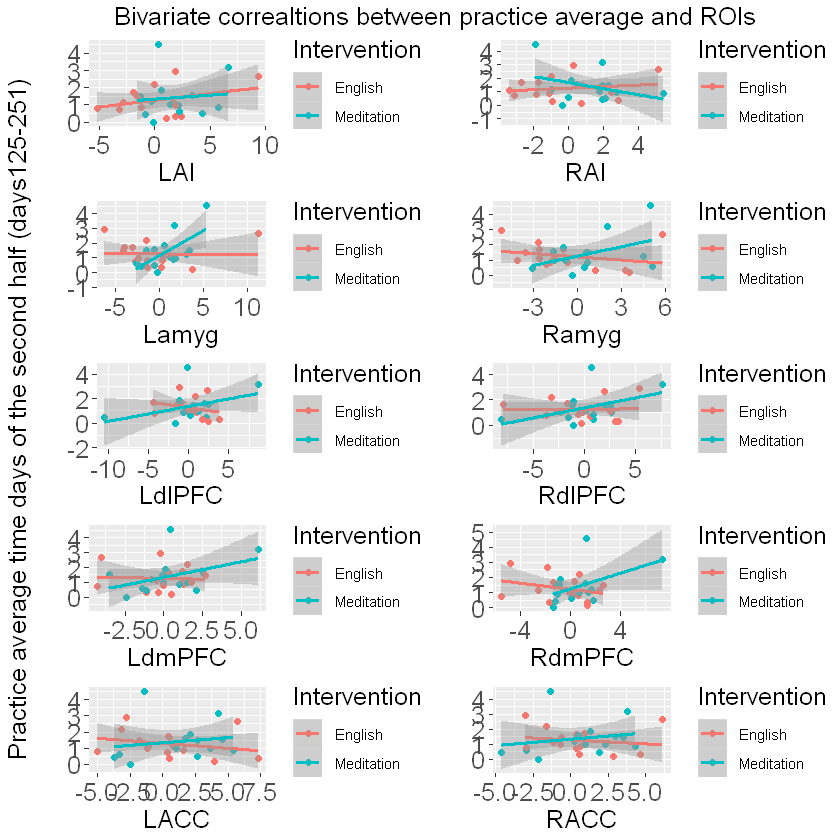

In [104]:
plotgridavg125 = function (data, column)
  ggplot(data = ROI2b2, aes_string(x = column,y='avg125',color='Intervention')) + geom_point() + geom_smooth(method='lm') + ylab('') +
  theme(strip.text=element_text(size=15),  axis.title=element_text(size=15) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15)) +
  theme(plot.title = element_text(size = 15, face = "bold")) + theme(plot.title = element_text(hjust = 0.5)) 

avg125plots <- lapply(colnames(ROI2b2[,c(3:12)]), plotgridavg125, data = ROI2b2[,c(3:15)])
require(gridExtra)
require(grid)
grid.arrange(grobs=avg125plots,left= textGrob("Practice average time days of the second half (days125-251)",gp=gpar(fontsize=15),rot = 90),top=textGrob("Bivariate correaltions between practice average and ROIs", gp=gpar(fontsize=15)), ncol=2)


### Plotgridvarf: A function to plot the relationship between brain activities and PRACTICE TIME VARIANCE in one grid

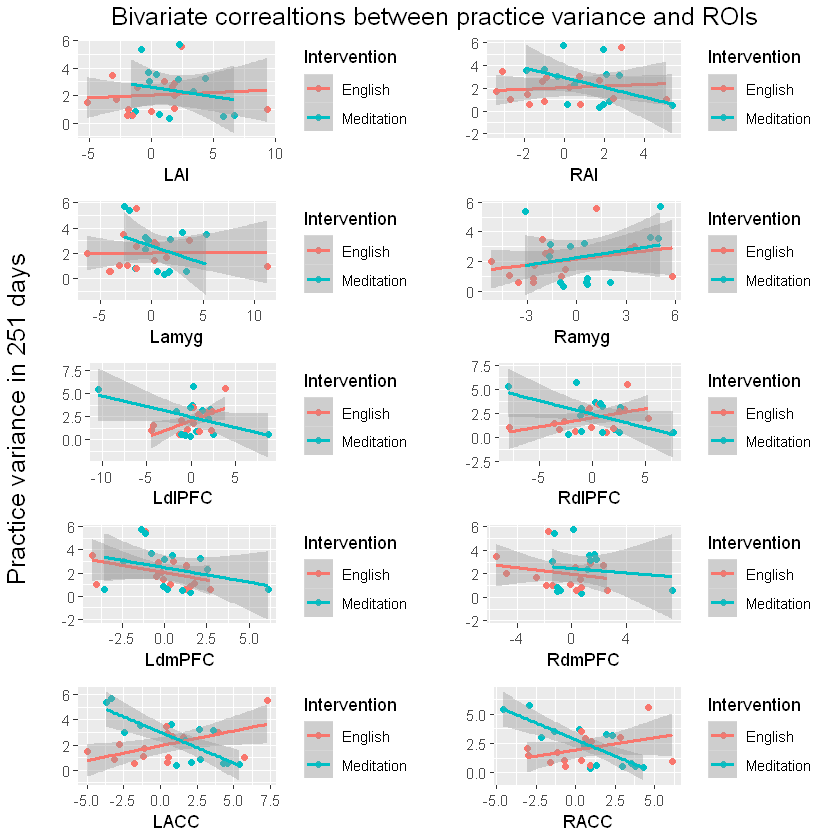

In [105]:
plotgridvarf = function (data, column)
  ggplot(data = ROI2b2, aes_string(x = column,y='varp',color='Intervention')) + geom_point() + geom_smooth(method='lm') + ylab('') 
varpplots2 <- lapply(colnames(ROI2b2[,c(3:12)]), plotgridvarf, data = ROI2b2[,c(3:15)])
grid.arrange(grobs=varpplots2,left= textGrob("Practice variance in 251 days",,gp=gpar(fontsize=15),rot = 90),top=textGrob("Bivariate correaltions between practice variance and ROIs", gp=gpar(fontsize=15)), ncol=2)



## Function:  pvals on plots
A function to denote the **uncorrected** p vals on the plots

## Plots with non-corrected pvals

### lm.coeff and lm.coeff2:  Functions to denote p vals on the average and variance plots  

In [66]:
lm.coeff <- function(input.df){
    
    calc.p.value <- function(col,  intercept=TRUE) {
#     print(col)
    .formula <- reformulate(termlabels = paste(col, "Intervention", sep=":"), response = 'avg125', intercept = intercept)
    mymodel.lm <-lm(.formula, data=input.df)
    er<-summary(mymodel.lm)
#     print(er$coefficient) 
    c(er$coefficient[c(2,3),c(1,4)])
#     print(er$coefficient[c(2,3),c(1,4)])
    }
    
    variables.list <- colnames(input.df)[colnames(input.df) != 'avg125' & colnames(input.df) != 'Intervention']
#     print(variables.list)
    p.rule.list <- lapply(variables.list, calc.p.value)
    coeff.names <- data.frame(c("BEnglish", "BMeditation", "PEnglish", "PMeditation"))
    df <- setNames(cbind(coeff.names, data.frame(p.rule.list)), c('coeffs', variables.list))
    rownames(df) <- df$coeffs
    df$coeffs <- NULL
    df
}


In [108]:
new_results <- lm.coeff(ROI2b2[,c(2,15,3:12)])

In [109]:
important_colnames = colnames(ROI2b2[,c(3:12)])


[1] 0.07857414 0.05468788 0.33308712 0.58055354
[1]  0.06040313 -0.15755053  0.58826931  0.25312557
[1] -0.005509743  0.332132933  0.923938844  0.004259218
[1] -0.06739888  0.20622349  0.41341540  0.05268550
[1] -0.09572797  0.12362836  0.40527385  0.07768326
[1] 0.006844823 0.159508779 0.929552848 0.049991042
[1] -0.02154193  0.20958346  0.87196685  0.07840428
[1] -0.10093410  0.26238269  0.33448215  0.02663164
[1] -0.06351789  0.06610251  0.44725353  0.47208719
[1] -0.05357030  0.08769666  0.62039789  0.40173697


Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'

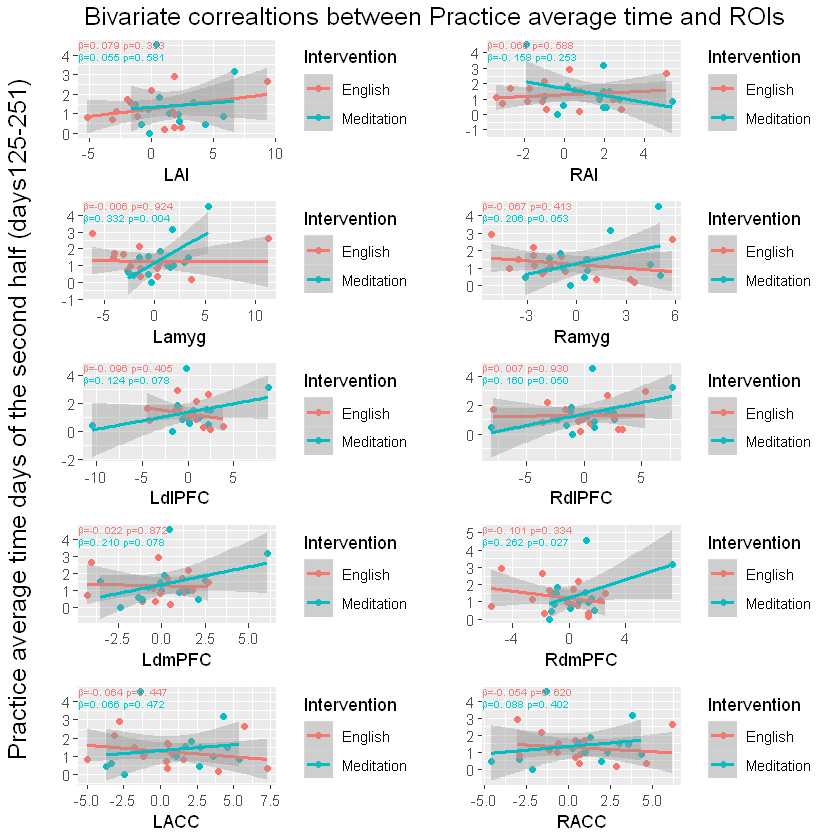

In [110]:
plotgridvarf = function (column, data){
#   print(column)
  .results <- lm.coeff(ROI2b2[,c(2,15,3:12)])
#   print(.results)
#   print(colnames(.results))
#   print(.results[,c(column)])
  coeffs = setNames(data.frame(new_results[, c(column)]), 'coeffs')[[1]]
  print(coeffs)
  ggplot(data = data, aes_string(x = column,y='avg125',color='Intervention')) + geom_point() + geom_smooth(method='lm') + ylab('') +
  annotate("text", 
           x=-Inf,
           y =Inf,
           hjust = 0,
           vjust = 1,
           label=TeX(sprintf("$\\beta$=%.3f  p=%.3f", coeffs[1], coeffs[3])),
           fontface = "italic",
           size= 2.2,
           color = "lightcoral") +
    
  annotate("text", 
           x=-Inf,
           y =Inf,
           hjust = 0,
           vjust = 2.2,
           label=TeX(sprintf("$\\beta$=%.3f  p=%.3f", coeffs[2], coeffs[4])),
           fontface = "italic",
           size= 2.2,
           color = "cyan3")

    #   geom_text(
# #       data = coeffs[c(1, 3)],
#       mapping = aes(x =6,y = 10, label = sprintf("Beta=%f\nP-value=%f", coeffs[[1]], coeffs[[3]]), color="lightcoral", size=2)) +
#   geom_text(
# #       data = coeffs[c(2,4)],
#       mapping = aes(x =6,y = 10, label = sprintf("Beta=%f\nP-value=%f", coeffs[[1]], coeffs[[3]]), color="cyan", size=2))
    }

important_colnames = colnames(ROI2b2[,c(3:12)])
varpplots2 <- lapply(important_colnames, plotgridvarf, data=ROI2b2)
grid.arrange(grobs=varpplots2,
             left= textGrob("Practice average time days of the second half (days125-251)",,gp=gpar(fontsize=15),rot = 90), 
             top=textGrob("Bivariate correaltions between Practice average time and ROIs", gp=gpar(fontsize=15)), ncol=2)


### Variance plots

In [70]:
lm.coeff2 <- function(input.df){
    
    calc.p.value <- function(col,  intercept=TRUE) {
#     print(col)
    .formula <- reformulate(termlabels = paste(col, "Intervention", sep=":"), response = 'varp', intercept = intercept)
    mymodel.lm <-lm(.formula, data=input.df)
    er<-summary(mymodel.lm)
#     print(er$coefficient) 
    c(er$coefficient[c(2,3),c(1,4)])
#     print(er$coefficient[c(2,3),c(1,4)])
    }
    
    variables.list <- colnames(input.df)[colnames(input.df) != 'varp' & colnames(input.df) != 'Intervention']
#     print(variables.list)
    p.rule.list <- lapply(variables.list, calc.p.value)
    coeff.names <- data.frame(c("BEnglish", "BMeditation", "PEnglish", "PMeditation"))
    df <- setNames(cbind(coeff.names, data.frame(p.rule.list)), c('coeffs', variables.list))
    rownames(df) <- df$coeffs
    df$coeffs <- NULL
    df
}

In [111]:
new_results2 <- lm.coeff2(ROI2b2[,c(2,14,3:12)])

[1]  0.03548959 -0.07229593  0.78670856  0.65359348
[1]  0.07780005 -0.28556788  0.66088706  0.19459316
[1]  0.01492765 -0.22981767  0.88750172  0.24656065
[1] 0.1373416 0.1754952 0.3193044 0.3099159
[1]  0.35280850 -0.22473102  0.04351099  0.03154694
[1]  0.18923828 -0.27382193  0.11295449  0.02690285
[1] -0.2535632 -0.2370411  0.2442866  0.2088844
[1] -0.11494423 -0.06327015  0.53165805  0.75092428
[1]  0.216330172 -0.411741698  0.046905653  0.001287882
[1]  0.1749292007 -0.5145804250  0.2032376206  0.0004814272


Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'"Warning message in is.na(x):
"is.na() applied to non-(list or vector) of type 'expression'

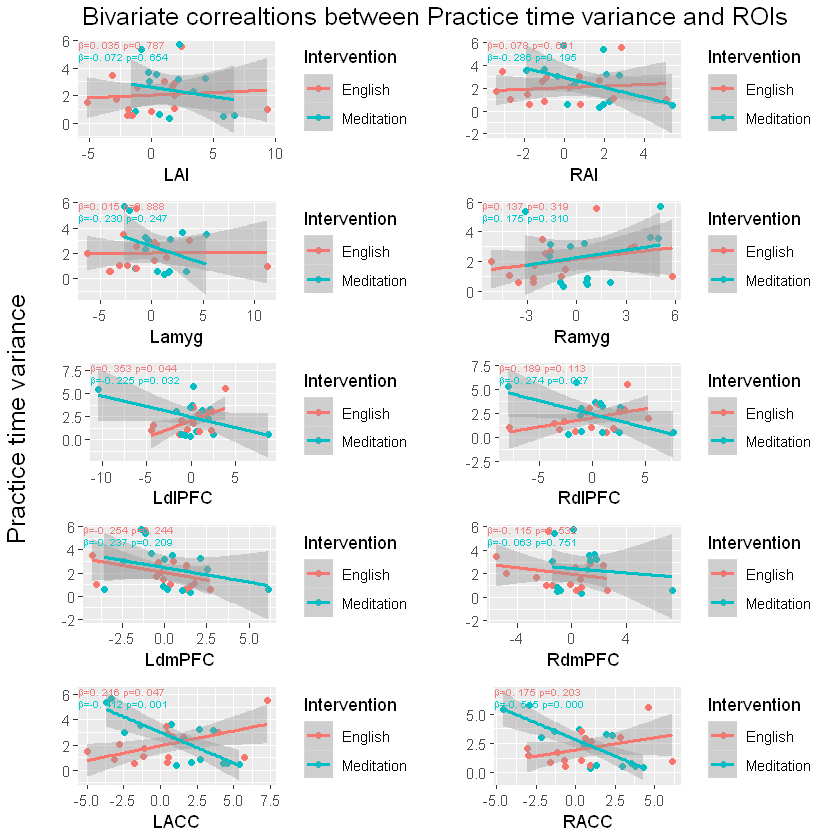

In [112]:
plotgridvarp = function (column, data){
#   print(column)
  .results <- lm.coeff2(ROI2b2[,c(2,14,3:12)])
#   print(.results)
#   print(colnames(.results))
#   print(.results[,c(column)])
  coeffs = setNames(data.frame(new_results2[, c(column)]), 'coeffs')[[1]]
  print(coeffs)
  ggplot(data = data, aes_string(x = column,y='varp',color='Intervention')) + geom_point() + geom_smooth(method='lm') + ylab('') +
  annotate("text", 
           x=-Inf,
           y =Inf,
           hjust = 0,
           vjust = 1,
           label=TeX(sprintf("$\\beta$=%.3f  p=%.3f", coeffs[1], coeffs[3])),
           fontface = "italic",
           size= 2.2,
           color = "lightcoral") +
    
  annotate("text", 
           x=-Inf,
           y =Inf,
           hjust = 0,
           vjust = 2.2,
           label=TeX(sprintf("$\\beta$=%.3f  p=%.3f", coeffs[2], coeffs[4])),
           fontface = "italic",
           size= 2.2,
           color = "cyan3")

    #   geom_text(
# #       data = coeffs[c(1, 3)],
#       mapping = aes(x =6,y = 10, label = sprintf("Beta=%f\nP-value=%f", coeffs[[1]], coeffs[[3]]), color="lightcoral", size=2)) +
#   geom_text(
# #       data = coeffs[c(2,4)],
#       mapping = aes(x =6,y = 10, label = sprintf("Beta=%f\nP-value=%f", coeffs[[1]], coeffs[[3]]), color="cyan", size=2))
    }

important_colnames = colnames(ROI2b2[,c(3:12)])
varpplots2 <- lapply(important_colnames, plotgridvarp, data=ROI2b2)
grid.arrange(grobs=varpplots2,
             left= textGrob("Practice time variance",,gp=gpar(fontsize=15),rot = 90), 
             top=textGrob("Bivariate correaltions between Practice time variance and ROIs", gp=gpar(fontsize=15)), ncol=2)


WE SHOULD LOOK FOR THE FUNCTION FOR THE LINEAR REGRESSION NOW
AND THEN PERFORM THE MULTIPLE COMPARISON ERROR 
THEN WE SEE WHAT STAYS 


### ROImelt: melted df of ROI2b2 for BOXPLOTS

In [114]:
ROImelt<-melt(ROI2b2,id.vars = c(1,2,13:17))
colnames(ROImelt)[7]<-'practice_stability'
colnames(ROImelt)[8]<-'Location'
ROImelt


sub,Intervention,avgp,varp,avg125,varp125,practice_stability,Location,value
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable,LAI,1.85024310
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable,LAI,2.41419331
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable,LAI,-0.79780702
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable,LAI,-0.25734621
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable,LAI,4.35723411
9,English,1.334728,2.9126965,0.3247863,1.01429413,unstable,LAI,1.88974708
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable,LAI,1.06772256
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable,LAI,-1.14577743
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable,LAI,2.17892238
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable,LAI,-0.13004709


#### Forming a new column to include a varaible that is a mixture of stability and intervention 

In [115]:
e<-which(ROImelt$Intervention=='English ' & ROImelt$practice_stability=='stable')
f<-which(ROImelt$Intervention=='English ' & ROImelt$practice_stability=='unstable')
g<-which(ROImelt$Intervention=='Meditation ' & ROImelt$practice_stability=='stable')
h<-which(ROImelt$Intervention=='Meditation ' & ROImelt$practice_stability=='unstable')



In [116]:
ROImelt[e,10]<-'ES'
ROImelt[f,10]<-'EU'
ROImelt[g,10]<-'MS'
ROImelt[h,10]<-'MU'
colnames(ROImelt)[10]<-'group_stability'
ROImelt


sub,Intervention,avgp,varp,avg125,varp125,practice_stability,Location,value,group_stability
1,English,2.910995,2.0288785,2.9294118,2.18543417,unstable,LAI,1.85024310,EU
2,English,2.165680,5.5795294,0.3289474,1.69035088,unstable,LAI,2.41419331,EU
5,Meditation,2.300971,5.3889206,0.4411765,2.31461676,unstable,LAI,-0.79780702,MU
6,Meditation,1.682927,3.6609356,1.2000000,1.97297297,unstable,LAI,-0.25734621,MU
8,Meditation,1.685714,3.2512315,0.4800000,0.82054054,unstable,LAI,4.35723411,MU
9,English,1.334728,2.9126965,0.3247863,1.01429413,unstable,LAI,1.88974708,EU
11,English,1.293388,3.0214499,0.1774194,0.22842906,unstable,LAI,1.06772256,EU
14,English,1.787037,2.5776916,0.8524590,0.57309308,unstable,LAI,-1.14577743,EU
15,Meditation,1.746781,3.1468107,0.9819820,1.05421785,unstable,LAI,2.17892238,MU
16,Meditation,1.019355,3.0191035,0.0000000,0.00000000,unstable,LAI,-0.13004709,MU


### Boxplots "without" FDR correction

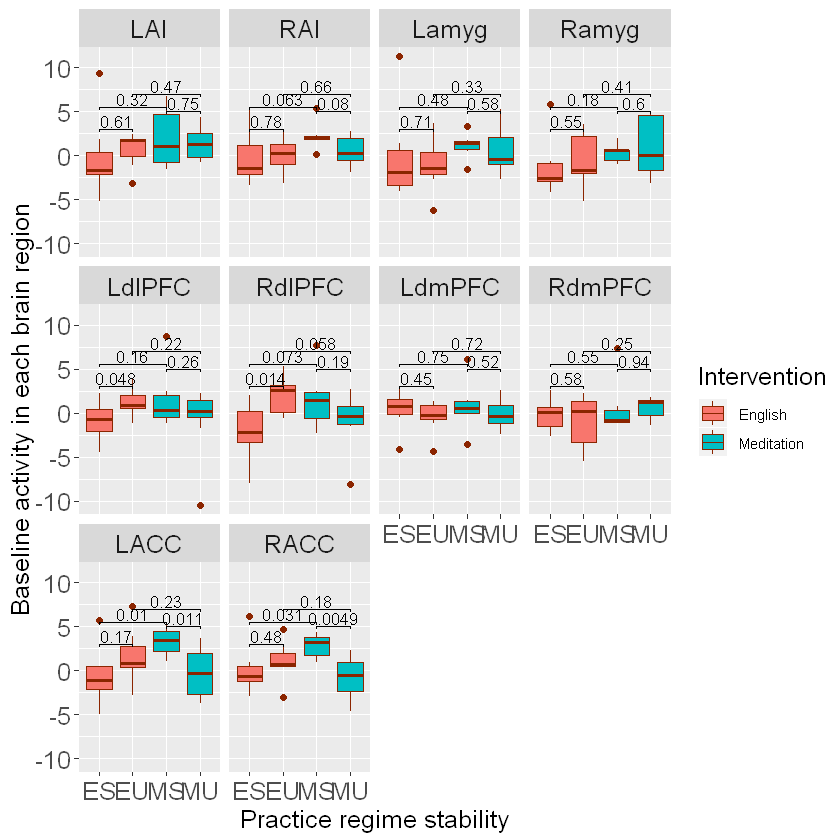

In [150]:
ggplot(data=ROImelt, aes(x=group_stability,y=value)) + geom_boxplot(aes(fill=Intervention),color="orangered4") + facet_wrap(~Location)+
  geom_signif(comparisons = list(c('ES','EU'),c('MS','MU'),c('ES','MS'),c('EU','MU')),tip_length = 0.01, test = "t.test",textsize = 3.5, na.rm = TRUE,y_position = c(3,5,5.5,7)) + xlab("Practice regime stability") + ylab("Beta weight") +
  theme(strip.text=element_text(size=15),  axis.title=element_text(size=15) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15)) +
ylab("Baseline activity in each brain region")



## ACC boxplots "with" and "without" FDR corrected pvals 
### Dataframe for only ACCs : ROIfmelt

In [140]:
ROIfmelt<-melt(data=ROI2b2, measure.vars = c(11,12))
ROIfmelt

sub,Intervention,LAI,RAI,Lamyg,Ramyg,LdlPFC,RdlPFC,LdmPFC,RdmPFC,avgp,varp,avg125,varp125,stability,variable,value
1,English,1.85024310,0.27818134,-6.2331530,-5.1765018,-1.12882640,5.3530017,-0.21315054,-4.79842814,2.910995,2.0288785,2.9294118,2.18543417,unstable,LACC,-2.8041820
2,English,2.41419331,2.88342597,-1.4215655,1.1899271,3.81661696,3.3550972,-1.12648222,-1.73037058,2.165680,5.5795294,0.3289474,1.69035088,unstable,LACC,7.3178466
5,Meditation,-0.79780702,1.94872512,-2.1083511,-3.1124173,-10.44698160,-8.0425374,-1.12804335,-1.24343759,2.300971,5.3889206,0.4411765,2.31461676,unstable,LACC,-3.7029202
6,Meditation,-0.25734621,-1.01233854,3.0044455,4.4910478,0.11215109,0.2530386,-0.78463987,1.63195823,1.682927,3.6609356,1.2000000,1.97297297,unstable,LACC,0.7128629
8,Meditation,4.35723411,2.09813184,-0.6057405,0.4522227,2.23302483,0.9149753,2.10744898,1.79222356,1.685714,3.2512315,0.4800000,0.82054054,unstable,LACC,2.6242822
9,English,1.88974708,-0.91364856,0.2509311,3.2253654,1.67350165,3.0238013,-0.36868671,1.35627881,1.334728,2.9126965,0.3247863,1.01429413,unstable,LACC,0.4869707
11,English,1.06772256,0.73960193,3.7012183,3.5246447,2.44086794,-0.2878777,0.49802920,1.36127999,1.293388,3.0214499,0.1774194,0.22842906,unstable,LACC,3.9330576
14,English,-1.14577743,-1.11328061,-1.4414149,-1.8933637,0.93889448,-0.5383270,1.29558294,0.26718403,1.787037,2.5776916,0.8524590,0.57309308,unstable,LACC,1.5931952
15,Meditation,2.17892238,2.76067676,1.8343476,-1.5813419,1.23568492,2.6713392,-0.03594588,1.38064190,1.746781,3.1468107,0.9819820,1.05421785,unstable,LACC,3.6187582
16,Meditation,-0.13004709,-0.35407185,-0.3034724,-0.3829261,-1.67155960,-1.0028120,-2.40107886,-1.37795947,1.019355,3.0191035,0.0000000,0.00000000,unstable,LACC,-2.4779829


[1] 17

### New column for "stability" category acronyms

In [142]:
e<-which(ROIfmelt$Intervention=='English ' & ROIfmelt$stability=='stable')
f<-which(ROIfmelt$Intervention=='English ' & ROIfmelt$stability=='unstable')
g<-which(ROIfmelt$Intervention=='Meditation ' & ROIfmelt$stability=='stable')
h<-which(ROIfmelt$Intervention=='Meditation ' & ROIfmelt$stability=='unstable')
ROIfmelt[e,18]<-'ES'
ROIfmelt[f,18]<-'EU'
ROIfmelt[g,18]<-'MS'
ROIfmelt[h,18]<-'MU'
colnames(ROIfmelt)[18]<-'group_stability'
colnames(ROIfmelt)[16]<-'location'
ROIfmelt


sub,Intervention,LAI,RAI,Lamyg,Ramyg,LdlPFC,RdlPFC,LdmPFC,RdmPFC,avgp,varp,avg125,varp125,stability,location,value,group_stability
1,English,1.85024310,0.27818134,-6.2331530,-5.1765018,-1.12882640,5.3530017,-0.21315054,-4.79842814,2.910995,2.0288785,2.9294118,2.18543417,unstable,LACC,-2.8041820,EU
2,English,2.41419331,2.88342597,-1.4215655,1.1899271,3.81661696,3.3550972,-1.12648222,-1.73037058,2.165680,5.5795294,0.3289474,1.69035088,unstable,LACC,7.3178466,EU
5,Meditation,-0.79780702,1.94872512,-2.1083511,-3.1124173,-10.44698160,-8.0425374,-1.12804335,-1.24343759,2.300971,5.3889206,0.4411765,2.31461676,unstable,LACC,-3.7029202,MU
6,Meditation,-0.25734621,-1.01233854,3.0044455,4.4910478,0.11215109,0.2530386,-0.78463987,1.63195823,1.682927,3.6609356,1.2000000,1.97297297,unstable,LACC,0.7128629,MU
8,Meditation,4.35723411,2.09813184,-0.6057405,0.4522227,2.23302483,0.9149753,2.10744898,1.79222356,1.685714,3.2512315,0.4800000,0.82054054,unstable,LACC,2.6242822,MU
9,English,1.88974708,-0.91364856,0.2509311,3.2253654,1.67350165,3.0238013,-0.36868671,1.35627881,1.334728,2.9126965,0.3247863,1.01429413,unstable,LACC,0.4869707,EU
11,English,1.06772256,0.73960193,3.7012183,3.5246447,2.44086794,-0.2878777,0.49802920,1.36127999,1.293388,3.0214499,0.1774194,0.22842906,unstable,LACC,3.9330576,EU
14,English,-1.14577743,-1.11328061,-1.4414149,-1.8933637,0.93889448,-0.5383270,1.29558294,0.26718403,1.787037,2.5776916,0.8524590,0.57309308,unstable,LACC,1.5931952,EU
15,Meditation,2.17892238,2.76067676,1.8343476,-1.5813419,1.23568492,2.6713392,-0.03594588,1.38064190,1.746781,3.1468107,0.9819820,1.05421785,unstable,LACC,3.6187582,MU
16,Meditation,-0.13004709,-0.35407185,-0.3034724,-0.3829261,-1.67155960,-1.0028120,-2.40107886,-1.37795947,1.019355,3.0191035,0.0000000,0.00000000,unstable,LACC,-2.4779829,MU


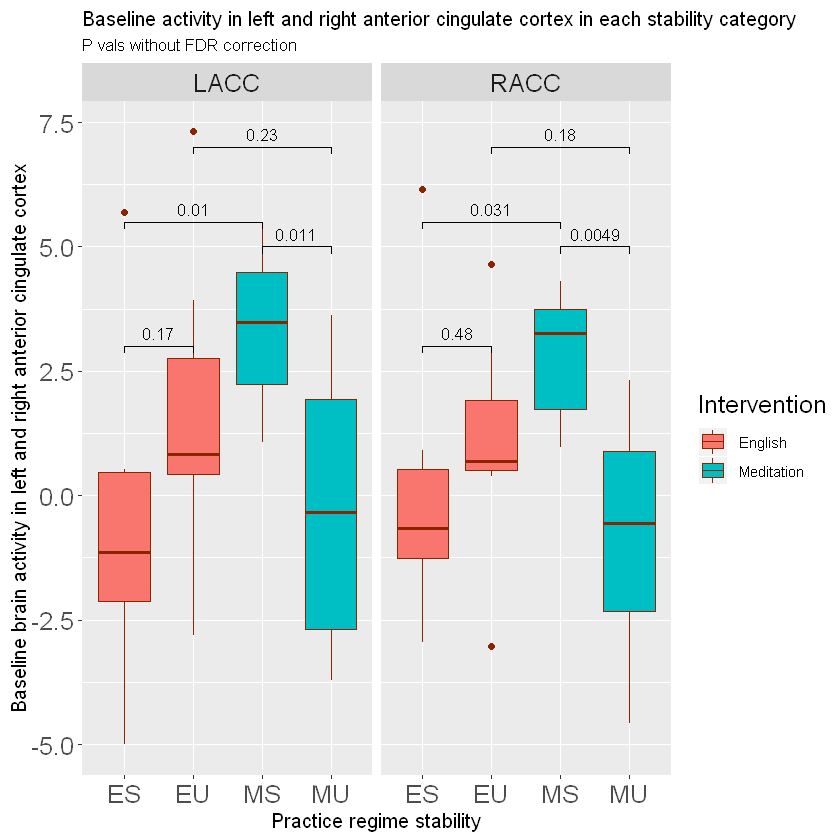

In [200]:
accbox<-ggplot(data=ROIfmelt, aes(x=group_stability,y=value)) + geom_boxplot(aes(fill=Intervention),color="orangered4") + facet_wrap(~location)+
  geom_signif(comparisons = list(c('ES','EU'),c('MS','MU'),c('ES','MS'),c('EU','MU')),tip_length = 0.01, test = "t.test",textsize = 3.5, na.rm = TRUE,y_position = c(3,5,5.5,7)) + xlab("Practice regime stability") + ylab("Beta weight") +
  theme(strip.text=element_text(size=15),  axis.title=element_text(size=12) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15)) +
theme(plot.title = element_text(size=12)) + theme(plot.subtitle = element_text(size=10)) +
ylab("Baseline brain activity in left and right anterior cingulate cortex") +labs(title="Baseline activity in left and right anterior cingulate cortex in each stability category", subtitle="P vals without FDR correction")


accbox

$data
$data[[1]]
     fill       ymin      lower     middle     upper      ymax
1 #F8766D -5.0040995 -2.1216963 -1.1371930 0.4671575 0.5371548
2 #F8766D -2.8041820  0.4277587  0.8345650 2.7631264 3.9330576
3 #00BFC4  1.0606721  2.2410929  3.4755221 4.4947530 5.3920672
4 #00BFC4 -3.7029202 -2.6891386 -0.3411687 1.9355740 3.6187582
5 #F8766D -2.9525953 -1.2618679 -0.6589792 0.5281309 0.9152962
6 #F8766D  0.3925150  0.5052527  0.6791388 1.9139968 2.8545152
7 #00BFC4  0.9665847  1.7348835  3.2592267 3.7357223 4.3151909
8 #00BFC4 -4.5818444 -2.3312732 -0.5552246 0.8987578 2.3126281
             outliers notchupper notchlower x PANEL group ymin_final ymax_final
1            5.690977  0.3089779 -2.5833640 1     1     1 -5.0040995   5.690977
2            7.317847  2.2292089 -0.5600789 2     1     2 -2.8041820   7.317847
3                      4.9292056  2.0218385 3     1     3  1.0606721   5.392067
4                      2.2422622 -2.9245996 4     1     4 -3.7029202   3.618758
5            6.1

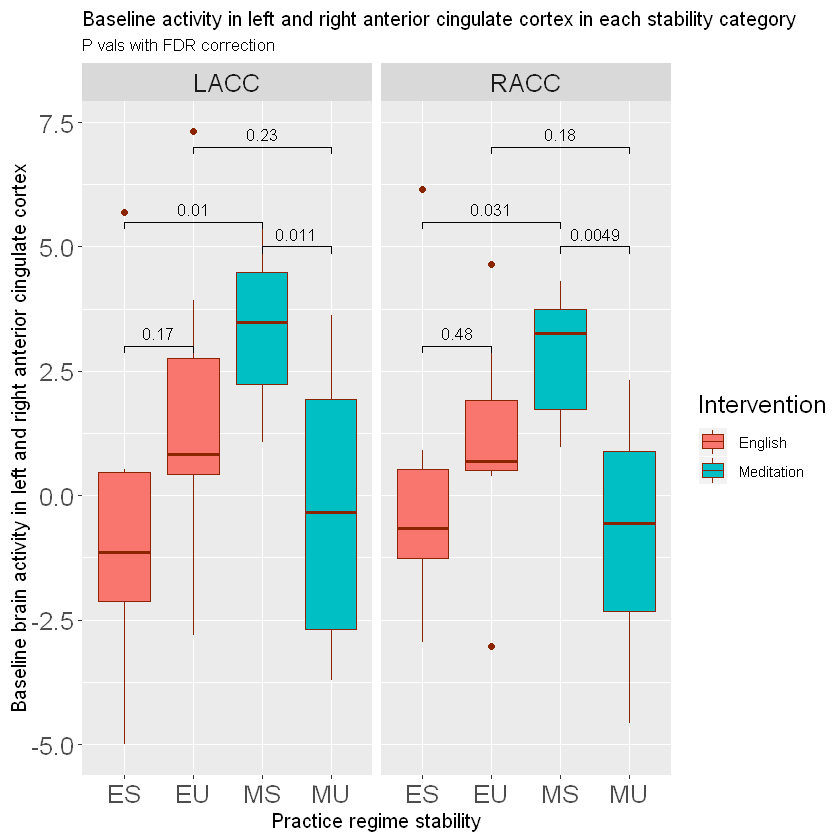

In [205]:
accbox2<-ggplot(data=ROIfmelt, aes(x=group_stability,y=value)) + geom_boxplot(aes(fill=Intervention),color="orangered4") + facet_wrap(~location)+
  geom_signif(comparisons = list(c('ES','EU'),c('MS','MU'),c('ES','MS'),c('EU','MU')),tip_length = 0.01, test = "t.test",textsize = 3.5, na.rm = TRUE,y_position = c(3,5,5.5,7)) + xlab("Practice regime stability") + ylab("Beta weight") +
  theme(strip.text=element_text(size=15),  axis.title=element_text(size=12) ,legend.title=element_text(size=15) ,axis.text.x =element_text(size=15) ,axis.text.y =element_text(size=15)) +
theme(plot.title = element_text(size=12)) + theme(plot.subtitle = element_text(size=10)) +
ylab("Baseline brain activity in left and right anterior cingulate cortex") +labs(title="Baseline activity in left and right anterior cingulate cortex in each stability category", subtitle="P vals with FDR correction")

df<-ggplot_build(accbox2)
df

[1] 0.2266667 0.0220000 0.2300000 0.0220000

[1] 0.4800 0.0620 0.2400 0.0196

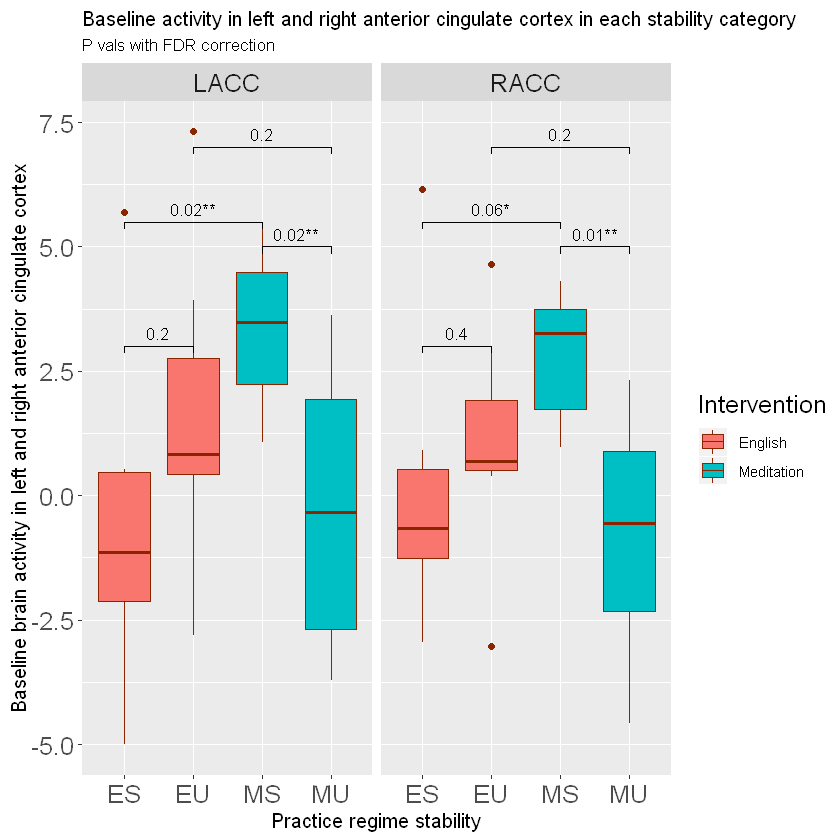

In [206]:
p.adjust(c(0.17,0.01,0.23,0.011), method = 'fdr')
#results  0.2266667 0.0220000 0.2300000 0.0220000
p.adjust(c(0.48,0.031,0.18,0.0049), method = 'fdr')
#result 0.4800 0.0620 0.2400 0.0196
#now lets change the annoattion in the df
df$data[[2]]$annotation <- c(rep("0.2",3),rep("0.02**",3),rep("0.2",3),
                             rep("0.02**",3),rep("0.4",3),rep("0.06*",3),rep("0.2",3),rep("0.01**",3))
#now changing the plot into the new plot

accbox3<-ggplot_gtable(df)
plot(accbox3)

### Formula: which rlm p values are significant 


### First formula:varp as the response variable

In [118]:
get.pvalue.dataframe <- function(input.df){
  
  calc.p.value <- function(col,  intercept=TRUE) {
    .formula <- reformulate(termlabels = col, response = 'varp', intercept = intercept)
    mymodel.rlm <-rlm(.formula, data=input.df)
    test = f.robftest(mymodel.rlm, var=col)
    test$p.value
  }
  
  variables.list <- colnames(input.df)[colnames(input.df) != 'varp']
  p.rule.list <- lapply(variables.list, calc.p.value)
  setNames(data.frame(p.rule.list), c(variables.list))
}

### Second Formula: avg125 as the response varaible

In [119]:
get.pvalue.dataframe2 <- function(input.df){
  
  calc.p.value <- function(col,  intercept=TRUE) {
    .formula <- reformulate(termlabels = col, response = 'avg125', intercept = intercept)
    mymodel.rlm <-rlm(.formula, data=input.df)
    test = f.robftest(mymodel.rlm, var=col)
    test$p.value
  }
  
  variables.list <- colnames(input.df)[colnames(input.df) != 'avg125']
  p.rule.list <- lapply(variables.list, calc.p.value)
  setNames(data.frame(p.rule.list), c(variables.list))
}


In [120]:
ROI2b2

,sub,Intervention,LAI,RAI,Lamyg,Ramyg,LdlPFC,RdlPFC,LdmPFC,RdmPFC,LACC,RACC,avgp,varp,avg125,varp125,stability
1,1,English,1.85024310,0.27818134,-6.2331530,-5.1765018,-1.12882640,5.3530017,-0.21315054,-4.79842814,-2.8041820,-3.0304177,2.910995,2.0288785,2.9294118,2.18543417,unstable
2,2,English,2.41419331,2.88342597,-1.4215655,1.1899271,3.81661696,3.3550972,-1.12648222,-1.73037058,7.3178466,4.6384526,2.165680,5.5795294,0.3289474,1.69035088,unstable
3,5,Meditation,-0.79780702,1.94872512,-2.1083511,-3.1124173,-10.44698160,-8.0425374,-1.12804335,-1.24343759,-3.7029202,-4.5818444,2.300971,5.3889206,0.4411765,2.31461676,unstable
4,6,Meditation,-0.25734621,-1.01233854,3.0044455,4.4910478,0.11215109,0.2530386,-0.78463987,1.63195823,0.7128629,0.2348676,1.682927,3.6609356,1.2000000,1.97297297,unstable
5,8,Meditation,4.35723411,2.09813184,-0.6057405,0.4522227,2.23302483,0.9149753,2.10744898,1.79222356,2.6242822,1.9367767,1.685714,3.2512315,0.4800000,0.82054054,unstable
6,9,English,1.88974708,-0.91364856,0.2509311,3.2253654,1.67350165,3.0238013,-0.36868671,1.35627881,0.4869707,0.6179904,1.334728,2.9126965,0.3247863,1.01429413,unstable
7,11,English,1.06772256,0.73960193,3.7012183,3.5246447,2.44086794,-0.2878777,0.49802920,1.36127999,3.9330576,2.8545152,1.293388,3.0214499,0.1774194,0.22842906,unstable
8,14,English,-1.14577743,-1.11328061,-1.4414149,-1.8933637,0.93889448,-0.5383270,1.29558294,0.26718403,1.5931952,0.6791388,1.787037,2.5776916,0.8524590,0.57309308,unstable
9,15,Meditation,2.17892238,2.76067676,1.8343476,-1.5813419,1.23568492,2.6713392,-0.03594588,1.38064190,3.6187582,2.3126281,1.746781,3.1468107,0.9819820,1.05421785,unstable
10,16,Meditation,-0.13004709,-0.35407185,-0.3034724,-0.3829261,-1.67155960,-1.0028120,-2.40107886,-1.37795947,-2.4779829,-2.1321420,1.019355,3.0191035,0.0000000,0.00000000,unstable


In [121]:
get.pvalue.dataframe2(ROI2b2[ROI2b2$Intervention=='English ', c(14,3:12)])

LAI,RAI,Lamyg,Ramyg,LdlPFC,RdlPFC,LdmPFC,RdmPFC,LACC,RACC
0.2652759,0.5613904,0.4615378,0.04598611,0.1932472,0.607734,0.8360216,0.4119391,0.2116899,0.2757184


In [123]:
ROIdf <- ROI2b2[ROI2b2$Intervention=='Meditation ', c(14,3:12)]

pvalvarp<-get.pvalue.dataframe(ROIdf) #for meditaiton 

pvalvarp[2,]<-get.pvalue.dataframe(ROI2b2[ROI2b2$Intervention=='English ', c(14,3:12)]) #for english

rownames(pvalvarp)[1]<-'Meditationvar'
rownames(pvalvarp)[2]<-'Englishvar'


In [124]:
ROIdf2 <- ROI2b2[ROI2b2$Intervention=='Meditation ', c(15,3:12)]

pvalavg<-get.pvalue.dataframe2(ROIdf2)
pvalavg[2,]<-get.pvalue.dataframe2(ROI2b2[ROI2b2$Intervention=='English ', c(15,3:12)]) #for english

rownames(pvalavg)[1]<-'Meditationavg'
rownames(pvalavg)[2]<-'Englishavg'




# Pval table : Significant P vals after FDR corrections

In [125]:
medavgp<-pvalavg[1,]
pvalavg[3,]<-p.adjust(medavgp,'fdr')
rownames(pvalavg)[3]<-'Medavg-FDR'
pvalavg[4,]<-p.adjust(pvalavg[2,],'fdr')
rownames(pvalavg)[4]<-'engavg-FDR'

pvalvarp[3,]<-p.adjust(pvalvarp[1,],'fdr')
rownames(pvalvarp)[3]<-'Medvar-FDR'
pvalvarp[4,]<-p.adjust(pvalvarp[2,],'fdr')
rownames(pvalvarp)[4]<-'engvar-FDR'

#binding the table into one 
pvaltable<-rbind(pvalavg,pvalvarp)
pvaltable

,LAI,RAI,Lamyg,Ramyg,LdlPFC,RdlPFC,LdmPFC,RdmPFC,LACC,RACC
Meditationavg,0.6472635,0.4033570,0.02055652,0.43936762,0.04931525,0.03447947,0.05159296,0.02347631,0.145826256,0.1058144438
Englishavg,0.2652759,0.5613904,0.46153781,0.04598611,0.19324716,0.60773399,0.83602156,0.41193906,0.211689908,0.2757183520
Medavg-FDR,0.6472635,0.4881862,0.10318592,0.48818625,0.10318592,0.10318592,0.10318592,0.10318592,0.208323223,0.1763574063
engavg-FDR,0.5514367,0.6752600,0.65933973,0.45986112,0.55143670,0.67525999,0.83602156,0.65933973,0.551436704,0.5514367041
Meditationvar,0.5404432,0.1625246,0.24731508,0.30182197,0.07530589,0.08992808,0.26615112,0.71736933,0.002430851,0.0008144636
Englishvar,0.8725116,0.9352311,0.89347919,0.35649829,0.04621975,0.13160549,0.17765084,0.40456572,0.023822791,0.2833977278
Medvar-FDR,0.6004924,0.3250493,0.37727747,0.37727747,0.22482021,0.22482021,0.37727747,0.71736933,0.012154255,0.0081446361
engvar-FDR,0.9352311,0.9352311,0.93523111,0.57795103,0.23109876,0.43868495,0.44412709,0.57795103,0.231098762,0.5667954557


# Final note
As mentioned before the results are not reliable because a problem occured during the fMRI data analysis. 
